## Business Problem

1. Which variables significantly impact the demand for Yulu's shared electric cycles?

2. How well do these variables explain or predict demand patterns?

## Why this analysis matters to the Business

###1. Revenue Recovery and Growth:
*   Identifying what factors drive demand helps Yulu optimize operations and marketing efforts, ensuring they target the right conditions to boost ridership and revenue.

###2. Efficient Resource Allocation:
*  By understanding demand drivers, Yulu can place bikes in the right locations at the right times, reducing idle cycles and operational costs.

###3. Customer-Centric Strategy:
*  Increases user satisfaction, retention, and repeat rides.

###4. Strategic Expansion:
*  Understanding current demand patterns helps predict demand in new locations, reducing risk in expansion decisions.

###5. Data-Driven Decision Making:
*  This analysis shows which metrics (temperature, holidays, office hours, etc.) actually matter, turning intuition into actionable data.



###6. Operational Forecasting:
*  Saves costs and improves user experience by ensuring availability without over-supply.

###7. Competitive Advantage:
*  Those who understand demand best can react fastest — smarter pricing, better deployment, more customer loyalty.

## How to begin:

### 1. Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset

In [59]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089 -O yulu_data.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/yulu_data.csv
100% 648k/648k [00:00<00:00, 7.10MB/s]


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df_org = pd.read_csv('yulu_data.csv')
df_org

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [61]:
df_org.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Insights:
1. Time of Day Effect (Midnight to 4 AM)
   1. As expected, demand is very low in these early hours.
   2. Ride counts are mostly from registered users.
   3. At 4 AM, only 1 registered user and 0 casual users — people don’t rent bikes late night unless commuting to work or an early shift.

2. Seasonal Influence (season = 1 → Spring)
   1. All rows are from January 1st, which falls in the Spring category (season = 1).
   2. Temperatures are between 9–10°C, with a "feels like" temp slightly warmer (~14°C). Reasonable for riding but still on the cooler side.
3. Weather Condition (weather = 1 → Clear)
   1. Weather is optimal across all 5 hours: clear skies, no mist or rain.
   2. This supports the idea that bad weather reduces demand, which we can explore with full dataset.

4. Humidity & Windspeed
   1. Humidity is relatively high (75–81%) but windspeed is zero, which likely keeps conditions comfortable.

5. Casual vs Registered Users
   1. Casual usage is low overall, especially before dawn.
   2. Registered users dominate nighttime/early morning demand — these are likely regular commuters.

In [65]:
#Checking the datatype
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [66]:
# Shape of dataset
df_org.shape

(10886, 12)

The dataset, consisting of 10,886 hourly observations and 12 features, represents a sample of bike-sharing usage data. This sample can be used to infer insights and trends about overall demand behavior and factors influencing it across the broader population

In [67]:
# Checking if there is any null values in my data
df_org.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


Dataset looks clean. No null values

In [68]:
# Identifying the categorical attributes
cat_temp_df = pd.DataFrame(columns=['Column', 'Unique Count'])
for column in df_org.columns:
  new_row = {'Column': column, 'Unique Count': df_org[column].nunique()}
  cat_temp_df = pd.concat([cat_temp_df, pd.DataFrame([new_row])], ignore_index=True)
cat_temp_df


,Column,Unique Count
0,datetime,10886
1,season,4
2,holiday,2
3,workingday,2
4,weather,4
5,temp,49
6,atemp,60
7,humidity,89
8,windspeed,28
9,casual,309


A column is a good candidate for category if:
1. It has much fewer unique values compared to the
total dataset
2. It represents categorical data.

Therefore we have considered below columns for categorical data

| season: 4 | holiday: 2 | workingday: 2 | weather: 4 |

In [69]:
# Conversion of categorical attributes to 'category' (If required)
categorical_df = df_org.copy()
cols_to_category = ['season', 'holiday', 'workingday', 'weather']
categorical_df[cols_to_category] = categorical_df[cols_to_category].astype('category')
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


In [70]:
categorical_df.groupby('season', observed=False)['count'].mean().sort_values(ascending=False)

,count
season,
3,234.417124
2,215.251372
4,198.988296
1,116.343261


Insights:
  * Season 3 (Autumn) has the highest average cycle rentals, indicating peak demand.
  * Season 1 (Spring) shows the lowest usage, possibly due to weather or less favorable conditions.
  * This clear pattern indicates that seasonality strongly influences user behavior.

Business Implications:
* Resource Allocation: Increase the availability of cycles and perform maintenance ahead of peak seasons (Autumn and Summer) to meet higher demand.

* Marketing Strategy: Run promotional campaigns or discounts during Spring to boost rentals in a low-demand season.

* Staff Planning: Align staffing for maintenance, support, and logistics with seasonal demand patterns.

* Revenue Forecasting: Use seasonal trends to forecast revenue and budget operations more efficiently throughout the year.

* Dynamic Pricing: Introduce variable pricing models based on seasons to maximize profit during high-demand periods.

In [71]:
categorical_df.groupby('weather', observed=False)['count'].mean().sort_values(ascending=False)

,count
weather,
1,205.236791
2,178.955540
4,164.000000
3,118.846333


Insights:
* Rentals are highest during clear weather (weather = 1), averaging around 205 rides.
* Rentals decrease steadily as weather worsens.
* The lowest rentals occur during snowy or rainy conditions (weather = 3) and extreme weather (weather = 4).
* This shows a negative correlation between weather severity and rental activity.

Business Implications
* Demand Forecasting: Rental volume can be predicted based on weather forecasts. Low demand is expected during poor weather, helping in inventory and staff planning.

* Dynamic Resource Deployment: Reduce fleet on roads or relocate them during extreme weather to prevent damage or underutilization.

* Promotional Campaigns: Introduce discounts or incentives during slightly poor weather conditions (like mist or cloudy weather) to encourage usage.

* Safety and Maintenance: Extra checks should be enforced during bad weather to avoid accidents or wear and tear on the cycles.

* Product Innovation: If feasible, explore features like weather-resistant cycles or optional add-ons (e.g., raincoats/ponchos) for users.


In [72]:
categorical_df.groupby('workingday', observed=False)['count'].mean().sort_values(ascending=False)

,count
workingday,
1,193.011873
0,188.506621


Insights:
* The average number of rentals is slightly higher on working days approx.(193) compared to non-working days approx.(~188).
* The difference is marginal, suggesting that day type (working vs non-working) may not drastically impact total rentals.
* However, this may vary by user type — for example, registered users might rent more on weekdays for commutes, while casual users might rent more on weekends or holidays for leisure.

Business Implications:
* Weekday vs Weekend Strategy: Although usage is relatively balanced, tailor campaigns differently:
  * Weekdays: Focus on commuters, office-goers. Tie up with office complexes or offer subscriptions.
  * Weekends: Attract casual users with leisure promotions (e.g., discounts near parks or tourist areas).

* Operational Planning:
  * Ensure balanced fleet availability throughout the week.
  * Slightly increase weekday availability near business hubs or metros.

In [73]:
categorical_df.groupby('holiday', observed=False)['count'].mean().sort_values(ascending=False)

,count
holiday,
0,191.741655
1,185.877814


Insights:
* The average number of rentals is slightly higher on non-holidays (191.74) compared to holidays (185.88).
* The difference is small but noticeable, suggesting that overall demand drops slightly during holidays.
* This might be due to:
  * Reduced commuting needs (no work/school).
  * Less usage by registered/commuter users.
  * Possible lower operational coverage or user preference shifts.

Business Implications:
* Different User Profiles on Holidays: Likely, casual users dominate on holidays, so focus on recreational routes, parks, and tourist areas.

* Marketing Strategy:
  * On holidays, run family/group ride offers or event-based promotions to boost rentals.
  * Highlight nearby attractions and leisure destinations in the app.

* Operational Adjustments:
  * Adjust fleet and customer service to cater to recreational areas rather than office hubs on holidays

In [74]:
df_org[df_org.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


There are no duplicate rows

In [75]:
# Creating a copy of original dataframe
df_copy = df_org.copy()

### Outlier detection using BoxPlot, IQR and ZScore

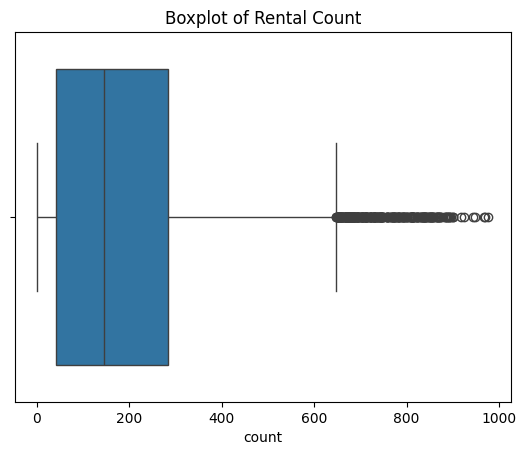

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64
Mean: 191.57413191254824
Median: 145.0


In [76]:
# Shows outlier of count column using BoxPlot
sns.boxplot(x='count', data=df_copy)
plt.title("Boxplot of Rental Count")
plt.show()
# By describe method
print(df_copy['count'].describe())
print("Mean:", df_copy['count'].mean())
print("Median:", df_copy['count'].median())

Since the mean is higher than the median, it shows that some counts are increasing
the average, which means there may be outliers in the data

In [77]:
# Using IQR Method
Q1 = df_copy['count'].quantile(0.25)
Q3 = df_copy['count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df_copy[(df_copy['count'] < lower_bound) | (df_copy['count'] > upper_bound)]
print("Number of outliers (IQR):", len(outliers_iqr))

Number of outliers (IQR): 300


300 outliers were found using IQR Method

In [78]:
# Using Zscore Method
from scipy.stats import zscore

# Step 1: Calculate Z-scores of the 'count' column
df_copy['zscore'] = zscore(df_copy['count'])

# Step 2: Define outliers as points where Z-score < -3 or > 3
outliers = df_copy[(df_copy['zscore'] < -3) | (df_copy['zscore'] > 3)]

# Step 3: Count the outliers
num_outliers = outliers.shape[0]

print("Number of outliers using Z-score method:", num_outliers)

Number of outliers using Z-score method: 147


147 outliers were found using Z-score method

### Summary insights on Outliers
  * Outlier analysis was conducted using both IQR and Z-score methods to identify extreme rental counts.
  * IQR method flagged 300 outliers. More robust to skewness → **better suited here**
  * Z-score method flagged 147 outliers. Missed some due to normality assumption
  * So, IQR is more appropriate as we are trying to be thorough in outlier detection for rental count

### Outlier Treatment

Text(0.5, 1.0, 'Distribution by Count')

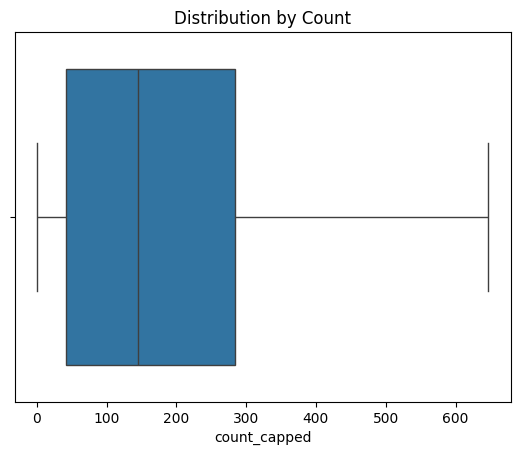

In [79]:
# IQR based Outlier treatment
df_copy_iqr = df_copy
df_copy_iqr['count_capped'] = np.clip(df_copy['count'], lower_bound, upper_bound)
sns.boxplot(x='count_capped', data=df_copy)
plt.title("Distribution by Count")

Text(0.5, 1.0, 'Distribution by Count')

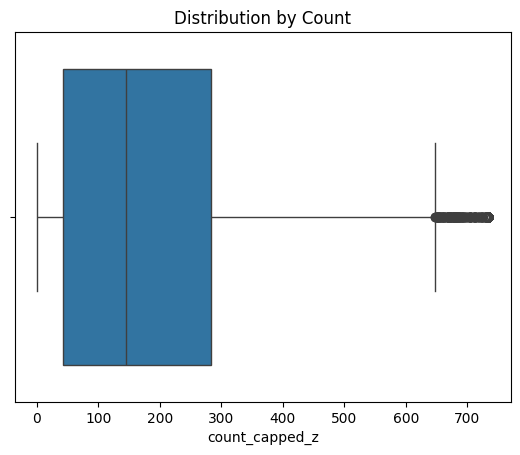

In [80]:
# Z-score based outlier treatment
from scipy.stats import zscore

df_copy_zscore = df_org.copy()
df_copy_zscore['zscore'] = zscore(df_copy_zscore['count'])

# Define limits
filtered = df_copy_zscore[abs(df_copy_zscore['zscore']) < 3]
upper_cap = filtered['count'].max()
lower_cap = filtered['count'].min()

# Apply capping
df_copy_zscore['count_capped_z'] = df_copy_zscore['count'].apply(
    lambda x: upper_cap if x > upper_cap else (lower_cap if x < lower_cap else x)
)
sns.boxplot(x='count_capped_z', data=df_copy_zscore)
plt.title("Distribution by Count")

In [81]:
print("Outliers after capping:", df_copy_zscore[(df_copy_zscore['count_capped_z'] > upper_cap) |
                                                (df_copy_zscore['count_capped_z'] < lower_cap)].shape[0])

Outliers after capping: 0


Although Z-score based capping removed statistical outliers beyond |Z| > 3, the boxplot still shows points outside the IQR whiskers, since it uses a different method (1.5 * IQR rule).

### 2. Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

In [82]:
categorical_df.groupby('season', observed=False)['count'].mean().sort_values(ascending=False)

,count
season,
3,234.417124
2,215.251372
4,198.988296
1,116.343261


Insights:

1. Fall (Season = 3) has the highest average demand (234):

  *  Likely due to comfortable weather — neither too hot nor too cold.
  *  People might prefer riding more outdoors.

2. Spring (Season = 1) has the lowest demand (116):

  *  This may be early-year months (like Jan–Mar), when people are less active, or weather is unfavorable in the location.

3. Season affects demand significantly:

  *  There's almost a 2x increase in average demand from Spring to Fall.
  *  This clearly suggests season is a strong predictor of rental volume.

Business Implication:
1. Yulu should stock more cycles and ensure availability in Fall and Summer.
2. Promotions or discounts could be used to increase usage in Spring and Winter
3. Seasonal planning (like battery maintenance or fleet allocation) can be optimized using this trend


In [83]:
categorical_df.groupby('weather', observed=False)['count'].mean().sort_values(ascending=False)

,count
weather,
1,205.236791
2,178.955540
4,164.000000
3,118.846333


Insights:

1. Clear weather (1) has the highest average demand (205):
  * As expected, people rent more bikes when the weather is good.

2. Demand drops significantly in bad weather (3 & 4):

  * From 205 → 118 (a ~43% drop) as weather worsens.

  * People avoid rentals when it rains or visibility is poor.

3. Weather is a strong influencing factor on rental demand:

  * It shows a clear negative correlation: worse weather → lower rentals.

Business Implications:

1. Forecasting: Yulu can predict lower demand during poor weather and adjust fleet distribution accordingly.

2. Incentives: Offer discounts on overcast or misty days (weather = 2) to maintain demand.

3. Operations: Maintenance crews and battery swaps can be more active when weather is good and demand spikes.

In [84]:
categorical_df.groupby('workingday', observed=False)['count'].mean().sort_values(ascending=False)

,count
workingday,
1,193.011873
0,188.506621


Insights:
1. Slightly higher demand on working days (193 vs. 188):
 * The difference is marginal (~4.5 rentals).
 * Indicates that people use Yulu consistently across all days, not just for commuting.

2. Possible dual-use pattern:
 * Working days: Used for commuting to work or metro stations.
 * Non-working days: Likely for leisure, shopping, or social outings.

Business Implications:
1. Yulu’s strategy should not rely solely on weekday commuters.
2. Marketing campaigns can target both commuter and leisure segments.
3. A nearly balanced usage trend means fleet allocation should stay stable through the week.

In [85]:
categorical_df.groupby('holiday', observed=False)['count'].mean().sort_values(ascending=False)

,count
holiday,
0,191.741655
1,185.877814


Insights:
1. Slightly higher demand on non-holidays (191.74 vs. 185.88):
* The difference is ~6 rentals on average.
* Suggests a small drop in usage on holidays, possibly because:
  * People stay home or travel long distances (not ideal for Yulu).
  * Regular commute patterns (e.g., office trips) are missing.

2. But the difference is not huge:
* Indicates Yulu also serves a leisure purpose, not just work-related use.

### 3. Select an appropriate test to check whether: Working Day has effect on number of electric cycles rented

**Hypothesis Formulation:**
  * Set up Null Hypothesis (H0):
    * There is no difference in the average number of cycles rented between working days and non-working days.
  * Set up Alternate Hypothesis (Ha):
    * There is a difference in the average number of cycles rented.

Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
   *  Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

#### Original dataframe (Without Outlier treatment)

   *  **Check test Assumptions:** Normality for Histogram and Q-Q Plot

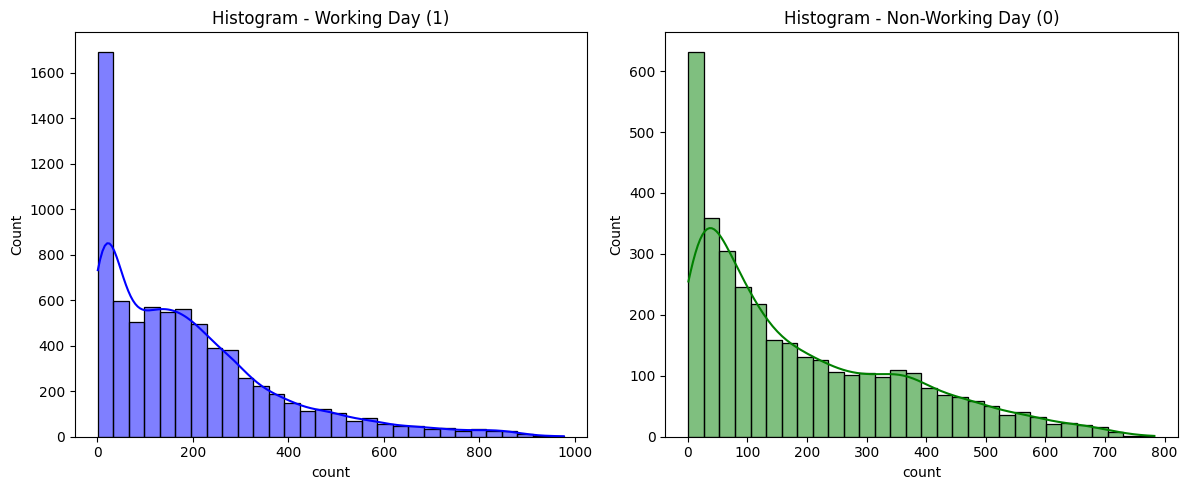

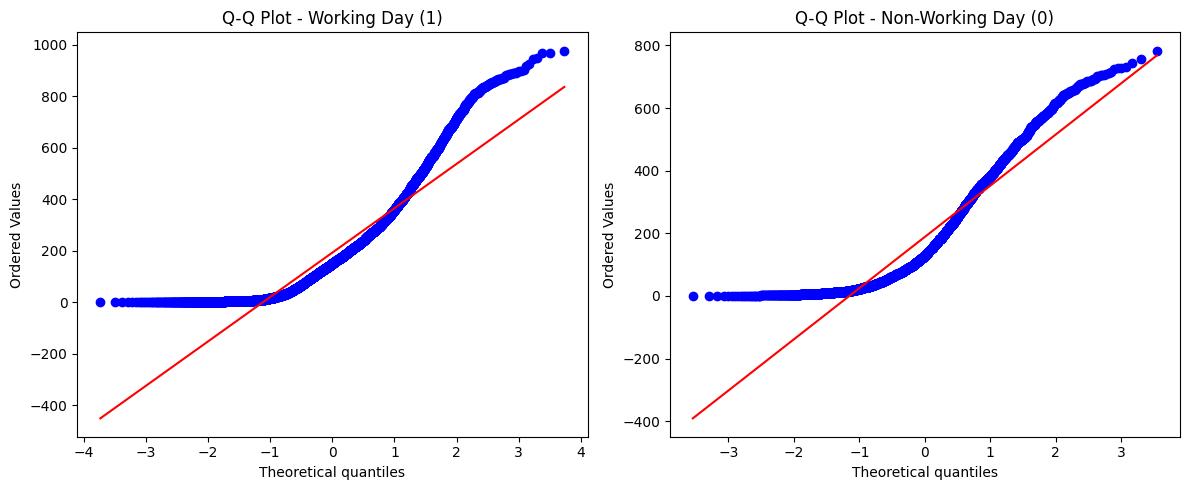

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
workingday_1 = df_org[df_org['workingday'] == 1]['count']
workingday_0 = df_org[df_org['workingday'] == 0]['count']

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(workingday_1, kde=True, bins=30, color='blue')
plt.title('Histogram - Working Day (1)')

plt.subplot(1, 2, 2)
sns.histplot(workingday_0, kde=True, bins=30, color='green')
plt.title('Histogram - Non-Working Day (0)')

plt.tight_layout()
plt.show()

# Q-Q Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(workingday_1, dist="norm", plot=plt)
plt.title("Q-Q Plot - Working Day (1)")

plt.subplot(1, 2, 2)
stats.probplot(workingday_0, dist="norm", plot=plt)
plt.title("Q-Q Plot - Non-Working Day (0)")

plt.tight_layout()
plt.show()

   *  **Check test Assumptions:** Levene’s Test to Check for Equal Variance

In [198]:
from scipy.stats import levene

stat, p_value = levene(workingday_1, workingday_0)
print(f"Levene’s Test p-value: {p_value:.5f}")

Levene’s Test p-value: 0.94378


*  Set a significance level (alpha) = 0.05

Since p-value: 0.94378 > Significance level 0.05, therefore Equal variances assumed

*  **TTest :** Calculate test Statistics

In [87]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(workingday_1, workingday_0, equal_var=True)
print(f"tstat = {t_stat}, p_val = {p_val}")
if p_val < 0.05:
  print(f'Reject null hypothesis : There is a difference in the average number of cycles rented')
else:
  print(f'Failed to Reject null hypothesis : There is no difference in the average number of cycles rented between working days and non-working days.')

tstat = 1.2096277376026694, p_val = 0.22644804226361348
Failed to Reject null hypothesis : There is no difference in the average number of cycles rented between working days and non-working days.


*  Decision to accept or reject null hypothesis.
  * The p_value 0.22 is much greater than 0.05, so we fail to reject the null hypothesis  

* Inference from the analysis
  * There is no statistically significant difference in the average number of electric cycles rented between working days and non-working days.
  
  * This suggests that being a working day does not have a strong influence on rental demand — users may be renting similarly regardless of whether it's a workday or not.

#### Capped dataframe (With Outlier treatment)

   *  **Check test Assumptions:** Normality for Histogram and Q-Q Plot

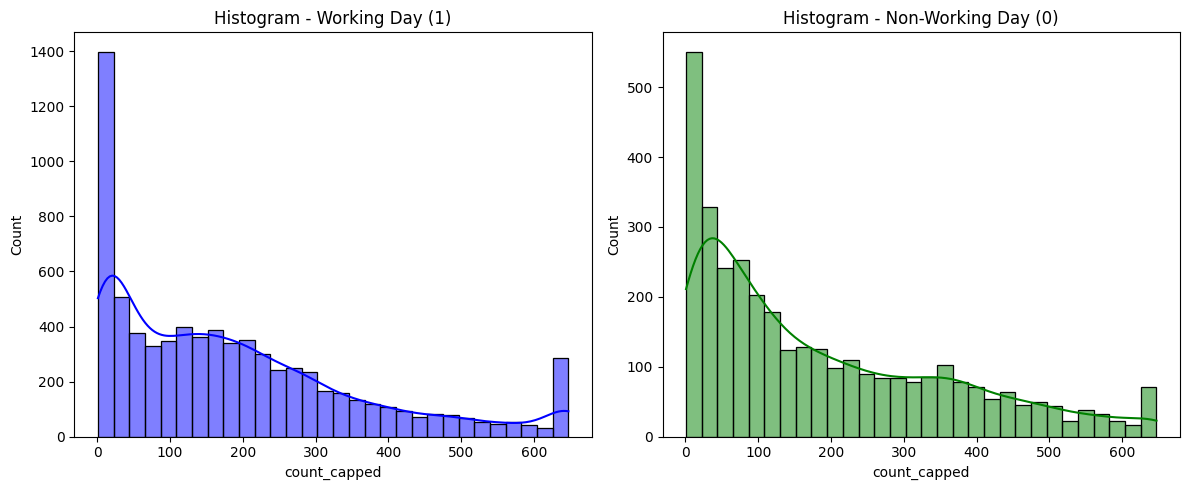

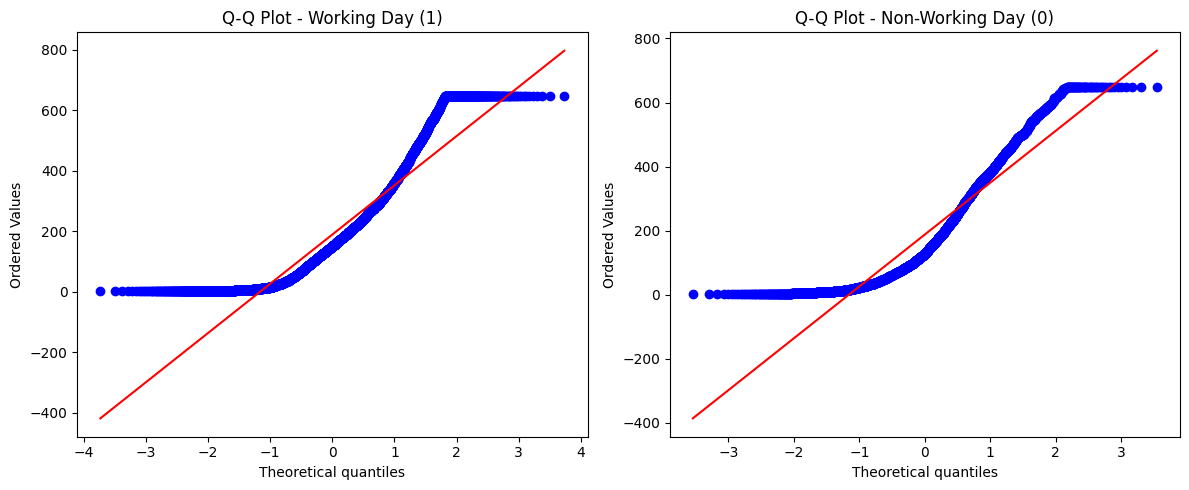

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
workingday__1 = df_copy_iqr[df_copy_iqr['workingday'] == 1]['count_capped']
workingday__0 = df_copy_iqr[df_copy_iqr['workingday'] == 0]['count_capped']

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(workingday__1, kde=True, bins=30, color='blue')
plt.title('Histogram - Working Day (1)')

plt.subplot(1, 2, 2)
sns.histplot(workingday__0, kde=True, bins=30, color='green')
plt.title('Histogram - Non-Working Day (0)')

plt.tight_layout()
plt.show()

# Q-Q Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(workingday__1, dist="norm", plot=plt)
plt.title("Q-Q Plot - Working Day (1)")

plt.subplot(1, 2, 2)
stats.probplot(workingday__0, dist="norm", plot=plt)
plt.title("Q-Q Plot - Non-Working Day (0)")

plt.tight_layout()
plt.show()

   *  **Check test Assumptions:** Levene’s Test to Check for Equal Variance

In [89]:
from scipy.stats import levene

stat, p_value = levene(workingday__1, workingday__0)
print(f"Levene’s Test p-value: {p_value:.5f}")

Levene’s Test p-value: 0.13747


*  Set a significance level (alpha) = 0.05

Since p-value: 0.13747 > Significance level 0.05, therefore Equal variances assumed

*  **TTest:** Calculate test Statistics

In [90]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(workingday__1, workingday__0, equal_var=True)
print(f"tstat = {t_stat}, p_val = {p_val}")
if p_val < 0.05:
  print(f'Reject null hypothesis : There is a difference in the average number of cycles rented')
else:
  print(f'Failed to Reject null hypothesis : There is no difference in the average number of cycles rented between working days and non-working days.')

tstat = 0.3163260408231243, p_val = 0.7517611135576576
Failed to Reject null hypothesis : There is no difference in the average number of cycles rented between working days and non-working days.


*  Decision to accept or reject null hypothesis.
  * The p_value 0.7517 is much greater than 0.05, so we fail to reject the null hypothesis  

* Inference from the analysis
  * There is no statistically significant difference in the average number of electric cycles rented between working days and non-working days.
  
  * This suggests that being a working day does not have a strong influence on rental demand — users may be renting similarly regardless of whether it's a workday or not.

#### Final Interpretation
In both original and capped datasets:

There is no statistically significant difference in average cycle rentals between working and non-working days.

This conclusion is robust to outlier treatment.

Hence, “Working Day” does not have a significant impact on the number of electric cycles rented.

### 4. Select an appropriate test to check whether: No. of cycles rented similar or different in different seasons

**Hypothesis Formulation:**
 * Set up Null Hypothesis (H0):
  * There is no significant difference in cycle rentals between seasons.
 *  Alternate Hypothesis (Ha):
  * At least one season has significantly different average rentals.

Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
   *  Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

#### Original dataframe (Without Outlier treatment)

   *  **Check test Assumptions:** Normality for Histogram and Q-Q Plot

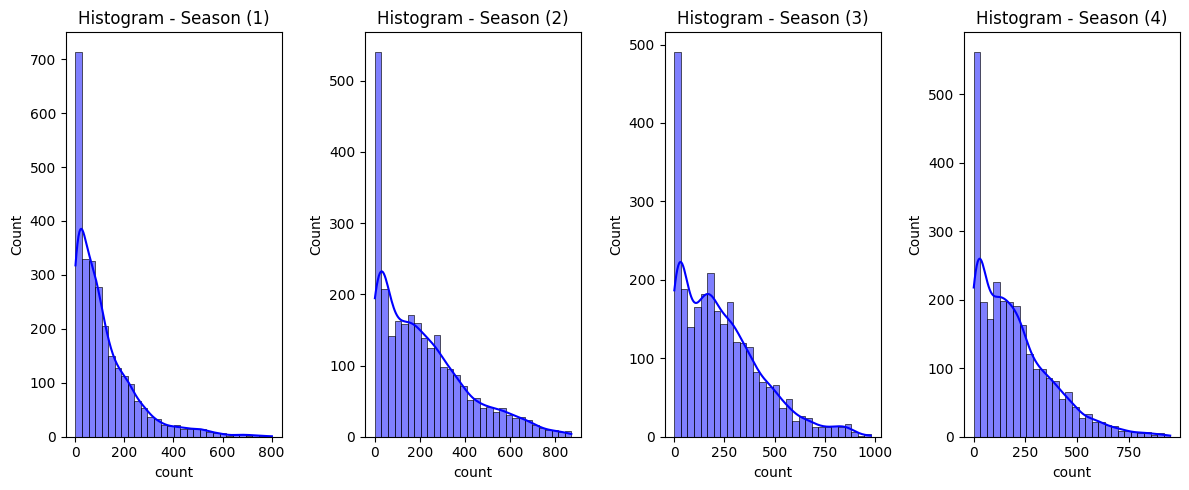

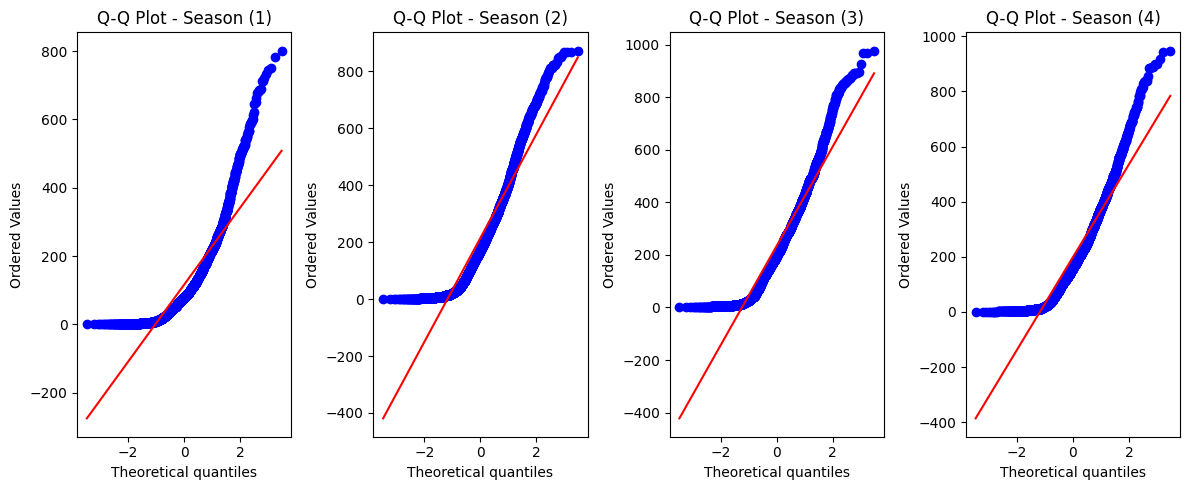

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
season_1 = df_org[df_org['season'] == 1]['count']
season_2 = df_org[df_org['season'] == 2]['count']
season_3 = df_org[df_org['season'] == 3]['count']
season_4 = df_org[df_org['season'] == 4]['count']

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
sns.histplot(season_1, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (1)')

plt.subplot(1, 4, 2)
sns.histplot(season_2, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (2)')

plt.subplot(1, 4, 3)
sns.histplot(season_3, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (3)')

plt.subplot(1, 4, 4)
sns.histplot(season_4, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (4)')

plt.tight_layout()
plt.show()

# Q-Q Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
stats.probplot(season_1, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (1)")

plt.subplot(1, 4, 2)
stats.probplot(season_2, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (2)")

plt.subplot(1, 4, 3)
stats.probplot(season_3, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (3)")

plt.subplot(1, 4, 4)
stats.probplot(season_4, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (4)")

plt.tight_layout()
plt.show()

   *  **Check test Assumptions:** Levene’s Test to Check for Equal Variance

In [92]:
from scipy.stats import levene

stat, p_value = levene(season_1, season_2, season_3, season_4)
print(f"Levene’s Test p-value: {p_value:}")

Levene’s Test p-value: 1.0147116860043298e-118


*  Set a significance level (alpha) = 0.05

Since p-value: 1.0147116860043298e-118 < Significance level 0.05, therefore Variance are not Equal

Note: Despite violation of assumptions, proceeded with one-way ANOVA as instructed in the case-study.

*  **ANNOVA :** Calculate test Statistics

In [95]:
from scipy.stats import f_oneway

# Group the 'count' values by each season
season_1 = df_org[df_org['season'] == 1]['count']
season_2 = df_org[df_org['season'] == 2]['count']
season_3 = df_org[df_org['season'] == 3]['count']
season_4 = df_org[df_org['season'] == 4]['count']

# Apply One-Way ANOVA
f_stat, p_value = f_oneway(season_1, season_2, season_3, season_4)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one season has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between seasons.')

ANOVA F-statistic: 236.94671081032106
p-value: 6.164843386499654e-149
Reject null hypothesis : At least one season has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 6.164843386499654e-149 is much smaller than 0.05, so we reject the null hypothesis by saying At least one season has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one season has a different average number of cycle rentals compared to the others.

Also validating the findings using non-parametric Kruskal-Wallis test (as robustness check).
  * **Kruskal-Wallis H-test :** Calculate test Statistics

In [96]:
from scipy.stats import kruskal

# Group the 'count' values by 'season'
season_1 = df_org[df_org['season'] == 1]['count']
season_2 = df_org[df_org['season'] == 2]['count']
season_3 = df_org[df_org['season'] == 3]['count']
season_4 = df_org[df_org['season'] == 4]['count']

# Perform the Kruskal-Wallis H-test
stat, p_value = kruskal(season_1, season_2, season_3, season_4)

print("Kruskal-Wallis Test Statistic:", stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one season has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between seasons.')

Kruskal-Wallis Test Statistic: 699.6668548181988
p-value: 2.479008372608633e-151
Reject null hypothesis : At least one season has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 2.479008372608633e-151 is much smaller than 0.05, so we reject the null hypothesis by saying At least one season has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one season has a different average number of cycle rentals compared to the others.

**Observations:**

* Both **Annova** and **Kruskal** test give same result i.e **p-value < 0.05, Conclusion is to Reject Null Hypothesis**

**Conclusion:**

Since the p-value < 0.05, we reject the null hypothesis.

There is statistically significant evidence to suggest that at least one season has a different average number of cycle rentals compared to the others.

**Business Implications:**

**Strategic planning should be seasonal:**

* Increase fleet availability, marketing, and operational staff in high-demand seasons

* Optimize costs during low-demand seasons by reducing fleet, storage, or promotions.

**Marketing & Pricing Strategy:**

* Tailor discounts or pricing strategies based on expected seasonal demand. For example, offer promotions in low-demand seasons to improve utilization.

**Product Improvements:**

* Seasonality might correlate with weather or festival patterns, so product design (like rain protection, battery capacity) can be optimized accordingly.

#### Capped dataframe (With Outlier treatment)

   *  **Check test Assumptions:** Normality for Histogram and Q-Q Plot

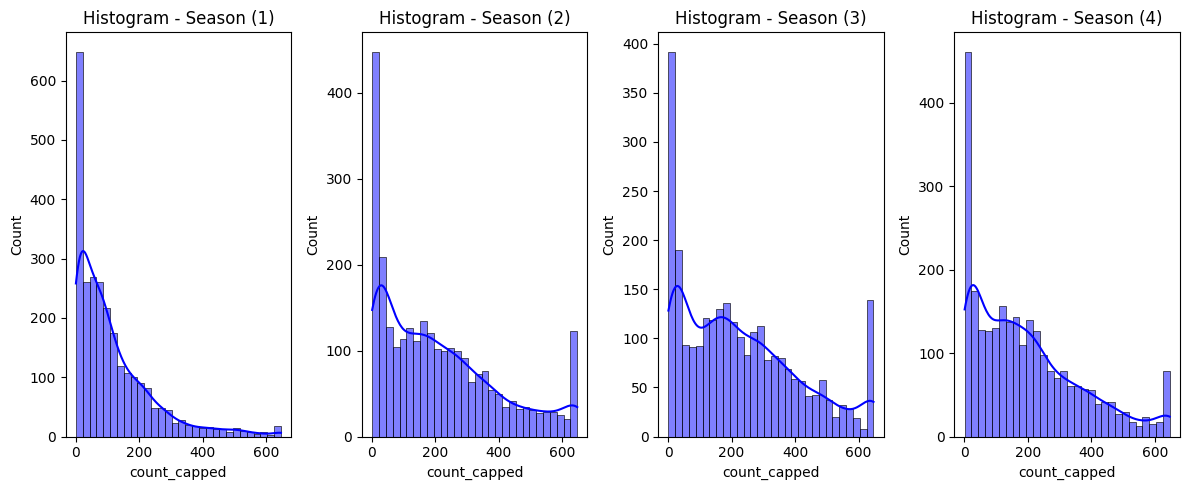

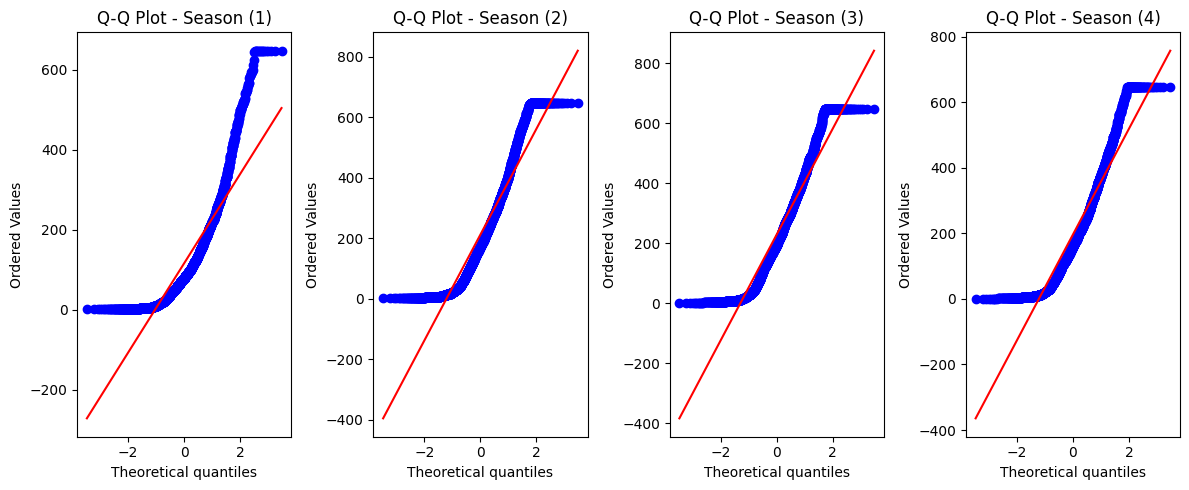

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
season__1 = df_copy_iqr[df_copy_iqr['season'] == 1]['count_capped']
season__2 = df_copy_iqr[df_copy_iqr['season'] == 2]['count_capped']
season__3 = df_copy_iqr[df_copy_iqr['season'] == 3]['count_capped']
season__4 = df_copy_iqr[df_copy_iqr['season'] == 4]['count_capped']

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
sns.histplot(season__1, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (1)')

plt.subplot(1, 4, 2)
sns.histplot(season__2, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (2)')

plt.subplot(1, 4, 3)
sns.histplot(season__3, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (3)')

plt.subplot(1, 4, 4)
sns.histplot(season__4, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (4)')

plt.tight_layout()
plt.show()

# Q-Q Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
stats.probplot(season__1, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (1)")

plt.subplot(1, 4, 2)
stats.probplot(season__2, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (2)")

plt.subplot(1, 4, 3)
stats.probplot(season__3, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (3)")

plt.subplot(1, 4, 4)
stats.probplot(season__4, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (4)")

plt.tight_layout()
plt.show()

   *  **Check test Assumptions:** Levene’s Test to Check for Equal Variance

In [98]:
from scipy.stats import levene

stat, p_value = levene(season__1, season__2, season__3, season__4)
print(f"Levene’s Test p-value: {p_value:}")

Levene’s Test p-value: 5.7233179707619984e-126


*  Set a significance level (alpha) = 0.05

Since p-value: 5.7233179707619984e-126 < Significance level 0.05, therefore Variance are not Equal

Note: Despite violation of assumptions, proceeded with one-way ANOVA as instructed in the case-study.

*  **ANNOVA :** Calculate test Statistics

In [103]:
from scipy.stats import f_oneway

# Group the 'count' values by each season
season__1 = df_copy_iqr[df_copy_iqr['season'] == 1]['count_capped']
season__2 = df_copy_iqr[df_copy_iqr['season'] == 2]['count_capped']
season__3 = df_copy_iqr[df_copy_iqr['season'] == 3]['count_capped']
season__4 = df_copy_iqr[df_copy_iqr['season'] == 4]['count_capped']

# Apply One-Way ANOVA
f_stat, p_value = f_oneway(season__1, season__2, season__3, season__4)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one season has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between seasons.')

ANOVA F-statistic: 243.33766355201303
p-value: 7.771506553957677e-153
Reject null hypothesis : At least one season has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 7.771506553957677e-153 is much smaller than 0.05, so we reject the null hypothesis by saying At least one season has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one season has a different average number of cycle rentals compared to the others.

Also validating the findings using non-parametric Kruskal-Wallis test (as robustness check).
  * **Kruskal-Wallis H-test :** Calculate test Statistics

In [105]:
from scipy.stats import kruskal

# Group the 'count' values by 'season'
season_1 = df_copy_iqr[df_copy_iqr['season'] == 1]['count_capped']
season_2 = df_copy_iqr[df_copy_iqr['season'] == 2]['count_capped']
season_3 = df_copy_iqr[df_copy_iqr['season'] == 3]['count_capped']
season_4 = df_copy_iqr[df_copy_iqr['season'] == 4]['count_capped']

# Perform the Kruskal-Wallis H-test
stat, p_value = kruskal(season__1, season__2, season__3, season__4)

print("Kruskal-Wallis Test Statistic:", stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one season has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between seasons.')

Kruskal-Wallis Test Statistic: 699.2817665514561
p-value: 3.0045514163996123e-151
Reject null hypothesis : At least one season has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 3.0045514163996123e-151 is much smaller than 0.05, so we reject the null hypothesis by saying At least one season has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one season has a different average number of cycle rentals compared to the others.

**Observations:**

* Both **Annova** and **Kruskal** test give same result i.e **p-value < 0.05, Conclusion is to Reject Null Hypothesis**

**Conclusion:**

Since the p-value < 0.05, we reject the null hypothesis.

There is statistically significant evidence to suggest that at least one season has a different average number of cycle rentals compared to the others.

**Business Implications:**

**Strategic planning should be seasonal:**

* Increase fleet availability, marketing, and operational staff in high-demand seasons

* Optimize costs during low-demand seasons by reducing fleet, storage, or promotions.

**Marketing & Pricing Strategy:**

* Tailor discounts or pricing strategies based on expected seasonal demand. For example, offer promotions in low-demand seasons to improve utilization.

**Product Improvements:**

* Seasonality might correlate with weather or festival patterns, so product design (like rain protection, battery capacity) can be optimized accordingly.

#### Final Interpretation
In both original and capped datasets:

There is statistically significant evidence to suggest that at least one season has a different average number of cycle rentals compared to the others.

This conclusion is robust to outlier treatment.

Hence, “season” has a significant impact on the number of electric cycles rented.

### 5. Select an appropriate test to check whether: No. of cycles rented similar or different in different weather

**Hypothesis Formulation:**
   * Set up Null Hypothesis (H0):
     * There is no significant difference in cycle rentals between different weather types.
   * Alternate Hypothesis (Ha):
     * At least one weather type has significantly different average rentals.

Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
   *  Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

#### Original dataframe (Without Outlier treatment)

   *  **Check test Assumptions:** Normality for Histogram and Q-Q Plot

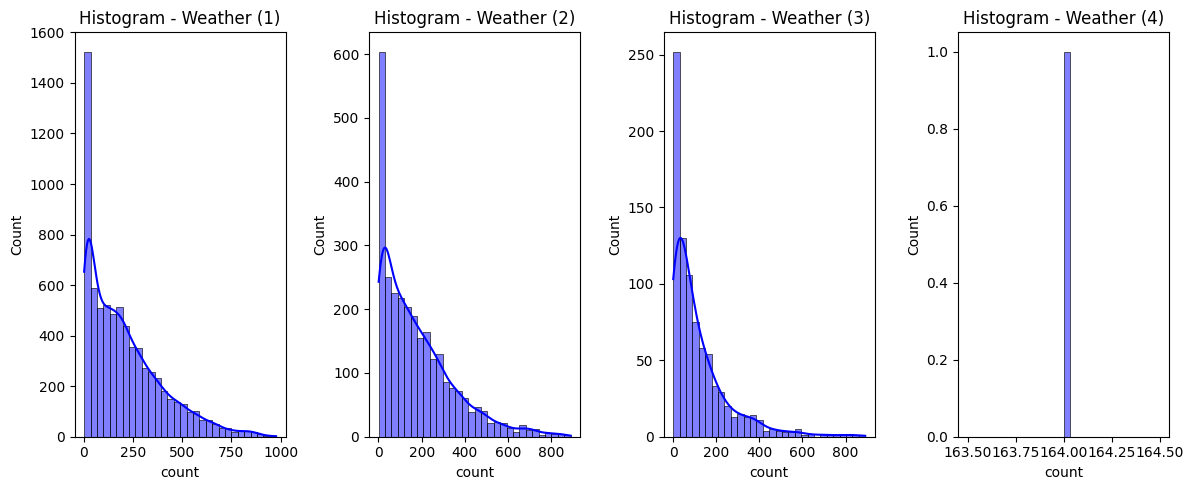

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
weather_1 = df_org[df_org['weather'] == 1]['count']
weather_2 = df_org[df_org['weather'] == 2]['count']
weather_3 = df_org[df_org['weather'] == 3]['count']
weather_4 = df_org[df_org['weather'] == 4]['count']

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
sns.histplot(weather_1, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (1)')

plt.subplot(1, 4, 2)
sns.histplot(weather_2, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (2)')

plt.subplot(1, 4, 3)
sns.histplot(weather_3, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (3)')

plt.subplot(1, 4, 4)
sns.histplot(weather_4, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (4)')

plt.tight_layout()
plt.show()

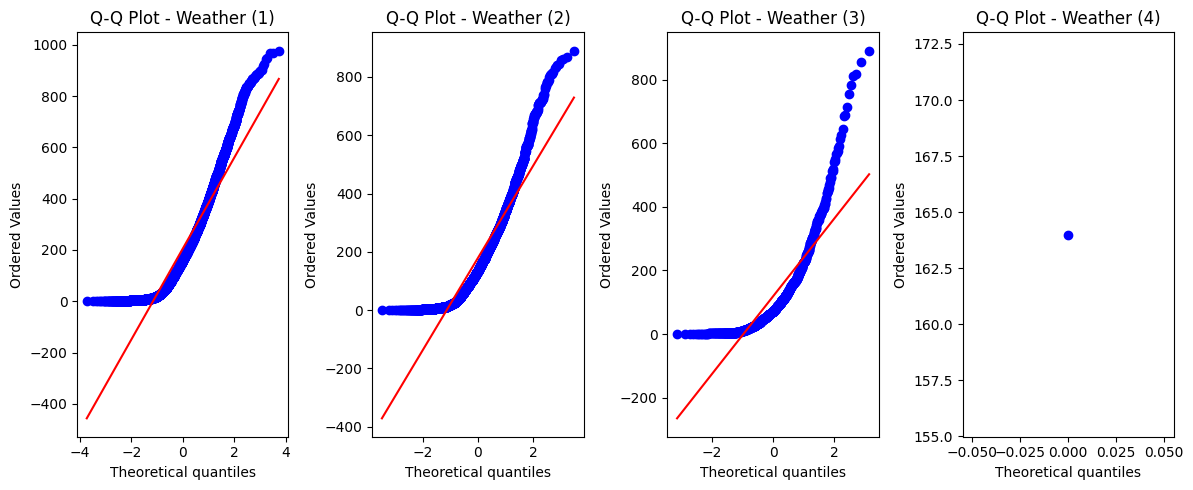

In [121]:
# Q-Q Plots
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
weather_1 = df_org[df_org['weather'] == 1]['count']
weather_2 = df_org[df_org['weather'] == 2]['count']
weather_3 = df_org[df_org['weather'] == 3]['count']
weather_4 = df_org[df_org['weather'] == 4]['count']

plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
stats.probplot(weather_1, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (1)")

plt.subplot(1, 4, 2)
stats.probplot(weather_2, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (2)")

plt.subplot(1, 4, 3)
stats.probplot(weather_3, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (3)")

plt.subplot(1, 4, 4)
stats.probplot(weather_4, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (4)")

plt.tight_layout()
plt.show()

   *  **Check test Assumptions:** Levene’s Test to Check for Equal Variance

In [122]:
from scipy.stats import levene

stat, p_value = levene(weather_1, weather_2, weather_3, weather_4)
print(f"Levene’s Test p-value: {p_value}")

Levene’s Test p-value: 3.504937946833238e-35


*  Set a significance level (alpha) = 0.05

Since p-value: 3.504937946833238e-35 < Significance level 0.05, therefore Variance are not Equal

Note: Despite violation of assumptions, proceeded with one-way ANOVA as instructed in the case-study.

*  **ANNOVA :** Calculate test Statistics

In [123]:
from scipy.stats import f_oneway

# Group the 'count' values by each weather type
weather_1 = df_org[df_org['weather'] == 1]['count']
weather_2 = df_org[df_org['weather'] == 2]['count']
weather_3 = df_org[df_org['weather'] == 3]['count']
weather_4 = df_org[df_org['weather'] == 4]['count']

# Apply One-Way ANOVA
f_stat, p_value = f_oneway(weather_1, weather_2, weather_3, weather_4)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one weather has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between different weather types.')

ANOVA F-statistic: 65.53024112793271
p-value: 5.482069475935669e-42
Reject null hypothesis : At least one weather has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 5.482069475935669e-42 is much smaller than 0.05, so we reject the null hypothesis by saying At least one weather has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one weather has a different average number of cycle rentals compared to the others.

Also validating the findings using non-parametric Kruskal-Wallis test (as robustness check).
  * **Kruskal-Wallis H-test :** Calculate test Statistics

In [124]:
from scipy.stats import kruskal

# Group the 'count' values by 'weather'
weather_1 = df_org[df_org['weather'] == 1]['count']
weather_2 = df_org[df_org['weather'] == 2]['count']
weather_3 = df_org[df_org['weather'] == 3]['count']
weather_4 = df_org[df_org['weather'] == 4]['count']

# Perform the Kruskal-Wallis H-test
stat, p_value = kruskal(weather_1, weather_2, weather_3, weather_4)

print("Kruskal-Wallis Test Statistic:", stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one weather has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between different weather types.')

Kruskal-Wallis Test Statistic: 205.00216514479087
p-value: 3.501611300708679e-44
Reject null hypothesis : At least one weather has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 3.501611300708679e-44 is much smaller than 0.05, so we reject the null hypothesis by saying At least one weather has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one weather has a different average number of cycle rentals compared to the others.

**Observations:**

* Both **Annova** and **Kruskal** test give same result i.e **p-value < 0.05, Conclusion is to Reject Null Hypothesis**

**Conclusion:**

Since the p-value < 0.05, we reject the null hypothesis.

There is statistically significant evidence to suggest that at least one weather has a different average number of cycle rentals compared to the others.

**Business Implications:**

* Weather conditions significantly impact the number of cycle rentals.
* This insight can help Yulu optimize bike availability and maintenance scheduling. For example, on clear or favorable weather days (weather type 1), higher rental demand can be expected, so more bikes should be deployed and operational.
* On days with adverse weather (e.g., heavy rain or mist), demand is lower, so resources like staffing or bike availability can be scaled down accordingly to reduce operational costs.

#### Capped dataframe (With Outlier treatment)

   *  **Check test Assumptions:** Normality for Histogram and Q-Q Plot

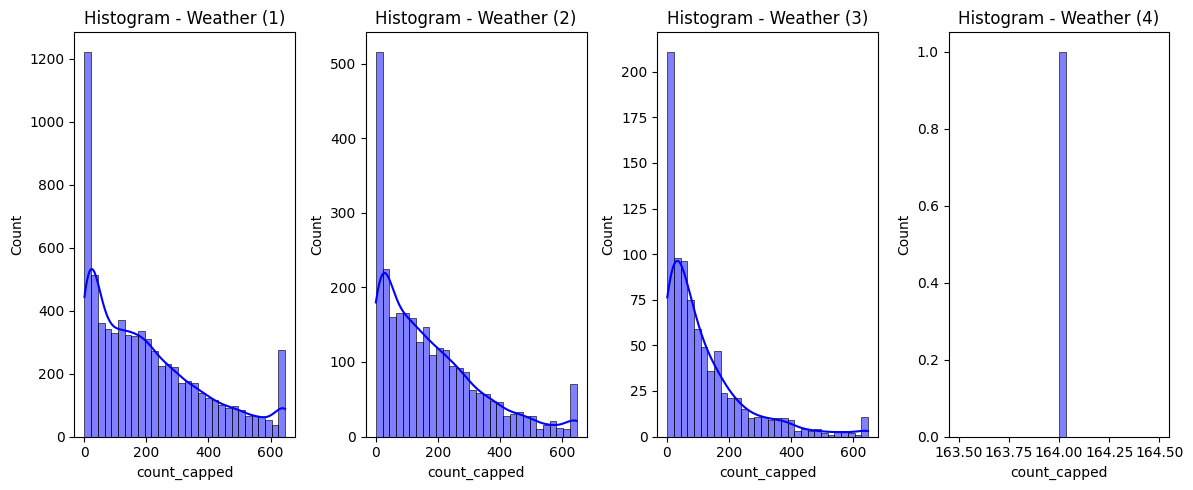

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
weather__1 = df_copy_iqr[df_copy_iqr['weather'] == 1]['count_capped']
weather__2 = df_copy_iqr[df_copy_iqr['weather'] == 2]['count_capped']
weather__3 = df_copy_iqr[df_copy_iqr['weather'] == 3]['count_capped']
weather__4 = df_copy_iqr[df_copy_iqr['weather'] == 4]['count_capped']

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
sns.histplot(weather__1, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (1)')

plt.subplot(1, 4, 2)
sns.histplot(weather__2, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (2)')

plt.subplot(1, 4, 3)
sns.histplot(weather__3, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (3)')

plt.subplot(1, 4, 4)
sns.histplot(weather__4, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (4)')

plt.tight_layout()
plt.show()

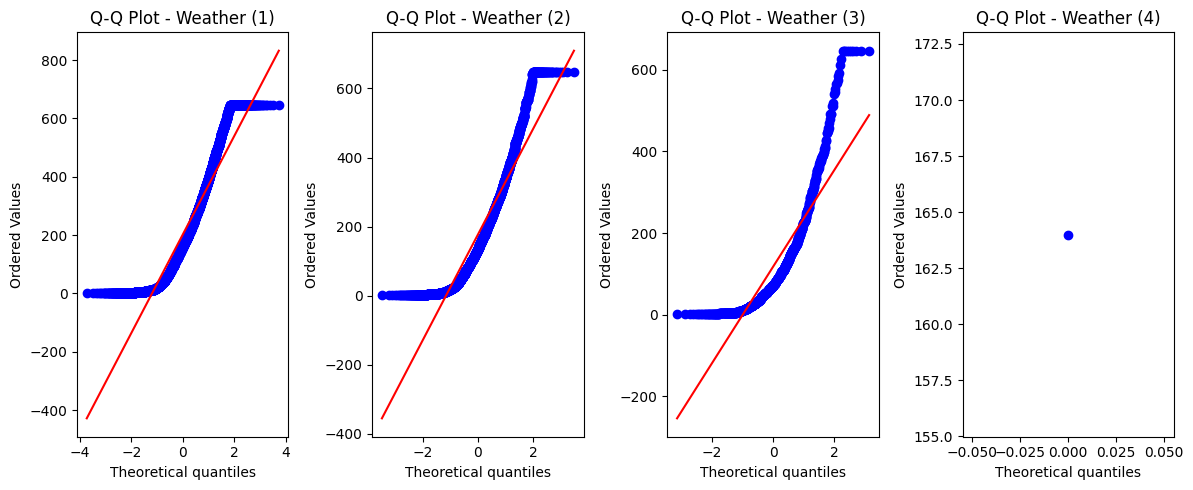

In [127]:
# Q-Q Plots
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
weather__1 = df_copy_iqr[df_copy_iqr['weather'] == 1]['count_capped']
weather__2 = df_copy_iqr[df_copy_iqr['weather'] == 2]['count_capped']
weather__3 = df_copy_iqr[df_copy_iqr['weather'] == 3]['count_capped']
weather__4 = df_copy_iqr[df_copy_iqr['weather'] == 4]['count_capped']

plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
stats.probplot(weather__1, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (1)")

plt.subplot(1, 4, 2)
stats.probplot(weather__2, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (2)")

plt.subplot(1, 4, 3)
stats.probplot(weather__3, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (3)")

plt.subplot(1, 4, 4)
stats.probplot(weather__4, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (4)")

plt.tight_layout()
plt.show()

   *  **Check test Assumptions:** Levene’s Test to Check for Equal Variance

In [129]:
from scipy.stats import levene

stat, p_value = levene(weather__1, weather__2, weather__3, weather__4)
print(f"Levene’s Test p-value: {p_value}")

Levene’s Test p-value: 2.499984328437755e-38


*  Set a significance level (alpha) = 0.05

Since p-value: 2.499984328437755e-38 < Significance level 0.05, therefore Variance are not Equal

Note: Despite violation of assumptions, proceeded with one-way ANOVA as instructed in the case-study.

*  **ANNOVA :** Calculate test Statistics

In [130]:
from scipy.stats import f_oneway

# Group the 'count' values by each weather type
weather__1 = df_copy_iqr[df_copy_iqr['weather'] == 1]['count_capped']
weather__2 = df_copy_iqr[df_copy_iqr['weather'] == 2]['count_capped']
weather__3 = df_copy_iqr[df_copy_iqr['weather'] == 3]['count_capped']
weather__4 = df_copy_iqr[df_copy_iqr['weather'] == 4]['count_capped']

# Apply One-Way ANOVA
f_stat, p_value = f_oneway(weather__1, weather__2, weather__3, weather__4)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one weather has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between different weather types.')

ANOVA F-statistic: 68.4116520342703
p-value: 8.034967610817961e-44
Reject null hypothesis : At least one weather has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 8.034967610817961e-44 is much smaller than 0.05, so we reject the null hypothesis by saying At least one weather has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one weather has a different average number of cycle rentals compared to the others.

Also validating the findings using non-parametric Kruskal-Wallis test (as robustness check).
  * **Kruskal-Wallis H-test :** Calculate test Statistics

In [132]:
from scipy.stats import kruskal

# Group the 'count' values by 'weather'
weather__1 = df_copy_iqr[df_copy_iqr['weather'] == 1]['count_capped']
weather__2 = df_copy_iqr[df_copy_iqr['weather'] == 2]['count_capped']
weather__3 = df_copy_iqr[df_copy_iqr['weather'] == 3]['count_capped']
weather__4 = df_copy_iqr[df_copy_iqr['weather'] == 4]['count_capped']

# Perform the Kruskal-Wallis H-test
stat, p_value = kruskal(weather__1, weather__2, weather__3, weather__4)

print("Kruskal-Wallis Test Statistic:", stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one weather has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between different weather types.')

Kruskal-Wallis Test Statistic: 205.04853208154285
p-value: 3.421748763291878e-44
Reject null hypothesis : At least one weather has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 3.421748763291878e-44 is much smaller than 0.05, so we reject the null hypothesis by saying At least one weather has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one weather has a different average number of cycle rentals compared to the others.

**Observations:**

* Both **Annova** and **Kruskal** test give same result i.e **p-value < 0.05, Conclusion is to Reject Null Hypothesis**

**Conclusion:**

Since the p-value < 0.05, we reject the null hypothesis.

There is statistically significant evidence to suggest that at least one weather has a different average number of cycle rentals compared to the others.

**Business Implications:**

* Weather conditions significantly impact the number of cycle rentals.
* This insight can help Yulu optimize bike availability and maintenance scheduling. For example, on clear or favorable weather days (weather type 1), higher rental demand can be expected, so more bikes should be deployed and operational.
* On days with adverse weather (e.g., heavy rain or mist), demand is lower, so resources like staffing or bike availability can be scaled down accordingly to reduce operational costs.

#### Final Interpretation
In both original and capped datasets:

There is statistically significant evidence to suggest that at least one weather has a different average number of cycle rentals compared to the others.

This conclusion is robust to outlier treatment.

Hence, “weather” has a significant impact on the number of electric cycles rented.

### 6. Select an appropriate test to check whether: Weather is dependent on season (check between 2 predictor variable)

**Hypothesis Formulation:**
  * Set up Null Hypothesis (H0):
   * Weather is independent of season.
  *  Alternate Hypothesis (Ha):
   * Weather is dependent on season.

Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
   *  Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

*  Set a significance level (alpha) = 0.05

*  **Chi-Square Test :** Calculate test Statistics

In [133]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(categorical_df['season'], categorical_df['weather'])
contingency_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [134]:
# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected frequencies:\n", pd.DataFrame(expected,
                                                index=contingency_table.index,
                                                columns=contingency_table.columns))
if p < 0.05:
    print("Reject the null hypothesis: Weather is dependent on season.")
else:
    print("Fail to reject the null hypothesis: No evidence that weather is dependent on season.")

Chi-Square Test Statistic: 49.158655596893624
Degrees of Freedom: 9
P-value: 1.549925073686492e-07
Expected frequencies:
 weather            1           2           3         4
season                                                
1        1774.546390  699.258130  211.948742  0.246739
2        1805.597648  711.493845  215.657450  0.251056
3        1805.597648  711.493845  215.657450  0.251056
4        1806.258313  711.754180  215.736359  0.251148
Reject the null hypothesis: Weather is dependent on season.


**Observations:**

* Chi-Square Value: 49.16, indicates a large difference between the observed and expected weather frequencies across seasons.

* p-value: 1.55e-07, this is far less than 0.05, so the result is statistically significant.

* Degrees of Freedom: 9

* Expected Frequencies:

  * Very small values (like 0.25) are seen in the expected frequencies for Weather category 4, indicating that some categories are rare and this may slightly affect the robustness of the test.

**Conclusion:**

* Since p < 0.05, you reject the null hypothesis.

* This means there is a statistically significant association between Weather and Season.

* The weather is dependent on the season, certain types of weather are more or less likely to occur in specific seasons.

**Note:**

* Even though the p-value says there's a significant relationship, if Chi-square Test Assumptions fails then the Chi-square test might give inaccurate results.

* As per Chi-square important assumption :

At least 80% of the expected frequencies should be ≥ 5, and no expected frequency should be < 1.

**Chi-square Assumption test**

In [135]:
expected_values = expected.flatten()

# Check for values < 5 and < 1
count_less_than_5 = np.sum(expected_values < 5)
count_less_than_1 = np.sum(expected_values < 1)
total = len(expected_values)

print("Expected values < 5:", count_less_than_5)
print("Expected values < 1:", count_less_than_1)
print("Percentage < 5:", (count_less_than_5 / total) * 100)

Expected values < 5: 4
Expected values < 1: 4
Percentage < 5: 25.0


**Chi-square important assumption is:**

At least 80% of the expected frequencies should be ≥ 5, and no expected frequency should be < 1.

  * If this condition is met, the Chi-square approximation is valid.

  * If this condition is not met, the Chi-square test might give inaccurate results.

* The Chi-square test result may not be reliable or accurate.

**Observations:**

This violates the assumptions of the Chi-square test because:

Test requirement is:

  * No expected frequency should be less than 1 and we have 4 values < 1

  * No more than 20% of the expected values should be less than 5 and I got 25%

**This means Chi-square test results are inaccurate.**

* To ensure statistical validity, it is advisable to merge this rare category with a similar one—such as combining it with 'Light Rain' to form a broader and more meaningful weather classification.

**Prior to combining** "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" with "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"

In [136]:
weather_combined_df = df_org.copy()
weather_combined_df['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


**After combining**

In [137]:
weather_combined_df['weather_combined'] = weather_combined_df['weather'].replace({4: 3})
weather_combined_df['weather_combined'].value_counts()

,count
weather_combined,
1,7192
2,2834
3,860


In [138]:
contingency_combined = pd.crosstab(weather_combined_df['season'], weather_combined_df['weather_combined'])
contingency_combined

weather_combined,1,2,3
season,,,
1,1759,715,212
2,1801,708,224
3,1930,604,199
4,1702,807,225


In [139]:
from scipy.stats import chi2_contingency
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_combined)

expected_values = expected.flatten()
count_less_than_5 = sum(expected_values < 5)
count_less_than_1 = sum(expected_values < 1)
percent_less_than_5 = (count_less_than_5 / len(expected_values)) * 100

print("New Contingency Table:\n", contingency_combined)
print("\nChi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("\nExpected values < 5:", count_less_than_5)
print("Expected values < 1:", count_less_than_1)
print("Percentage of expected values < 5:", percent_less_than_5)

New Contingency Table:
 weather_combined     1    2    3
season                          
1                 1759  715  212
2                 1801  708  224
3                 1930  604  199
4                 1702  807  225

Chi-square statistic: 46.098057769660684
p-value: 2.8304096630424703e-08
Degrees of freedom: 6

Expected values < 5: 0
Expected values < 1: 0
Percentage of expected values < 5: 0.0


In [140]:
if p_value < 0.05:
    print("Reject null hypothesis: Weather is dependent on season.")
else:
    print("Fail to reject null hypothesis: Weather is independent of season.")

Reject null hypothesis: Weather is dependent on season.


**Observations:**

* Chi-square statistic: 46.10, a large value indicates strong evidence of association between season and weather_combined.

* p-value: 2.83e-08, extremely small or much less than 0.05 this means there is statistically significance between weather and season.

* Reject the null hypothesis, Weather (even after combining) still depends on season.

* Degrees of Freedom: 6

* Expected Value Checks:

  * Expected values < 5: 0

  * Expected values < 1: 0

  * Percentage of expected values < 5: 0.0%

* This means the assumptions of Chi-square test are fully satisfied now.

**Business Implications:**

* Weather still changes with season, even after combining categories, the strong seasonal dependency remains.

* Use this to forecast demand:

  * Plan ahead for bad weather seasons that might reduce ride demand.

  * Prepare for moderate weather seasons with higher user activity.

* Operational Actions:

  * Shift fleets or reduce idle bikes in low-demand weather-season combos.

* Boost support, availability, and marketing during favorable weather periods.

* Marketing Strategy:

  * Offer ride protection, flexible pricing, or bonuses in tougher weather.

  * Launch promotions during weather-friendly seasons to capture higher demand.

* Business Implication:

  * The analysis reveals that weather patterns are not independent of seasons — they are significantly associated. This means certain weather conditions occur more frequently in specific seasons.

  * Bike rental demand forecasting can be seasonally adjusted based on expected weather patterns.

  * For example, if rainy or poor weather (weather category 3 or 4) is more common during a specific season, then lower demand can be anticipated and fleet allocation or staffing can be adjusted accordingly.

  * Marketing campaigns can be weather-aware and season-specific. For instance, promoting rain-resistant gear or offering discounts during lower-demand seasons with poor weather.

  * Companies can plan for maintenance schedules or downtime more accurately when unfavorable weather is expected in a given season.

## Evaluation Criteria:

### 1. Define Problem Statement and perform Exploratory Data Analysis

* Definition of problem (as per given problem statement with additional views)
  * The given problem aims to analyze the factors affecting the number of electric cycles rented by users. Key variables under consideration include season, weather, working day, and holiday status. The primary objective is to identify whether these independent variables have a statistically significant impact on the dependent variable — count of cycles rented.
  * Additional Views:
    
    1. User Behavior Patterns:
Understanding if users rent more during specific seasons or favorable weather can help in resource allocation and demand forecasting.
    
    2. Operational Strategy:
If demand is significantly lower on holidays or during bad weather, Yulu can optimize maintenance schedules, redistribute bikes, or run targeted promotions.
    
    3. Relationship Between Predictors:
Before modeling, it’s important to check whether predictors like season and weather are dependent, which could lead to multicollinearity if used in advanced predictive models.
    4. Data Integrity & Statistical Assumptions:
The presence of outliers and assumption checks (like normality and equal variance) are also crucial for ensuring robust and reliable hypothesis testing.

* Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

In [141]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089 -O yulu_data.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/yulu_data.csv
100% 648k/648k [00:00<00:00, 13.9MB/s]


In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
df_org = pd.read_csv('yulu_data.csv')
df_org

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [144]:
df_org.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Insights:
1. Time of Day Effect (Midnight to 4 AM)
  *  As expected, demand is very low in these early hours.
  *  Ride counts are mostly from registered users.
  *  At 4 AM, only 1 registered user and 0 casual users — people don’t rent bikes late night unless commuting to work or an early shift.

2. Seasonal Influence (season = 1 → Spring)
  *  All rows are from January 1st, which falls in the Spring category (season = 1).
  *  Temperatures are between 9–10°C, with a "feels like" temp slightly warmer (~14°C). Reasonable for riding but still on the cooler side.
3. Weather Condition (weather = 1 → Clear)
  *  Weather is optimal across all 5 hours: clear skies, no mist or rain.
  *  This supports the idea that bad weather reduces demand, which we can explore with full dataset.

4. Humidity & Windspeed
  *  Humidity is relatively high (75–81%) but windspeed is zero, which likely keeps conditions comfortable.

5. Casual vs Registered Users
  *  Casual usage is low overall, especially before dawn.
  *  Registered users dominate nighttime/early morning demand — these are likely regular commuters.

In [145]:
# Shape of dataset
df_org.shape

(10886, 12)

The dataset, consisting of 10,886 hourly observations and 12 features, represents a sample of bike-sharing usage data. This sample can be used to infer insights and trends about overall demand behavior and factors influencing it across the broader population

In [146]:
# Datatype of all attributes
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [147]:
# Checking if there is any null values in my data
df_org.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


Dataset looks clean. No null values

In [148]:
# Identifying the categorical attributes
cat_temp_df = pd.DataFrame(columns=['Column', 'Unique Count'])
for column in df_org.columns:
  new_row = {'Column': column, 'Unique Count': df_org[column].nunique()}
  cat_temp_df = pd.concat([cat_temp_df, pd.DataFrame([new_row])], ignore_index=True)
cat_temp_df


,Column,Unique Count
0,datetime,10886
1,season,4
2,holiday,2
3,workingday,2
4,weather,4
5,temp,49
6,atemp,60
7,humidity,89
8,windspeed,28
9,casual,309


A column is a good candidate for category if:
1. It has much fewer unique values compared to the
total dataset
2. It represents categorical data.

Therefore we have considered below columns for categorical data

| season: 4 | holiday: 2 | workingday: 2 | weather: 4 |

In [149]:
# Conversion of categorical attributes to 'category' (If required)
categorical_df = df_org.copy()
cols_to_category = ['season', 'holiday', 'workingday', 'weather']
categorical_df[cols_to_category] = categorical_df[cols_to_category].astype('category')
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


In [150]:
# Statistical Summary for int columns
categorical_df.describe(include=['int64']).T.astype(int)

,count,mean,std,min,25%,50%,75%,max
humidity,10886,61,19,0,47,62,77,100
casual,10886,36,49,0,4,17,49,367
registered,10886,155,151,0,36,118,222,886
count,10886,191,181,1,42,145,284,977


Insights:
* High Variability in Users:
  * The standard deviation is quite high for both casual (49) and registered (151) users compared to their means, indicating large variation in daily demand.

* Registered Users Drive Majority of Usage:
  * Registered users approx.(155 avg) far outnumber casual users approx.(~36 avg) on a daily basis.
  * Median also supports this: casual (17) vs registered (118).
  * Implication: Loyal customers (registered) are the primary drivers of business.

* Right-Skewed Demand:

  * For all user types and total count, mean > median, suggesting right-skewed distribution (a few days have very high rentals).

  * Some extreme values (max count = 977) may be outliers or peak demand days (e.g., events, weekends).

* Humidity Varies Widely:
  * Ranges from 0 to 100, with a median of 62.
  * Weather-related variables likely influence user behavior significantly — useful for predictive modeling.

Business Implication:
  * Focus on Retention of Registered Users:
    * Since registered users form the bulk of the usage, marketing strategies should focus on retention and loyalty programs.

  * Identify Peak Usage Patterns:
    * The long tail of high demand days (e.g., max count of 977) suggests the need for dynamic fleet allocation — scale up resources on high-demand days.

  * Manage Resources Based on Weather/Humidity:
    * Varying humidity may affect ride comfort; high humidity could lead to lower casual usage.
    * Weather-based pricing or promotions could be explored.

  * Outlier and Demand Spike Management:
    * Outlier days with very high count might need special planning (e.g., festivals, weekends).
    * Important to use outlier detection and smoothing techniques for better forecasting.

In [151]:
# Statistical Summary for categorical columns
cat_summary = categorical_df.describe(include='category').T
cat_summary['unique'] = categorical_df.nunique()
cat_summary

,count,unique,top,freq
season,10886,4,4,2734
holiday,10886,2,0,10575
workingday,10886,2,1,7412
weather,10886,4,1,7192


Insights
* Seasonal Distribution:
  * All 4 seasons are represented.
  * Season "4" (Winter, assuming mapping) is most frequent, occurring ~25% of the time.
  * Seasonality is not uniform — indicates potential seasonal trends in rentals.

* Very Few Holidays:
  * Only 311 out of 10,886 (~2.8%) are holidays.
  * Most data (97.2%) reflects non-holiday conditions, which may skew the overall trends towards normal weekdays.
  * Need to analyze holidays separately to avoid dilution in overall trends.

* Majority are Working Days:
  * ~68% of the data are working days.
  * May lead to higher rentals during commuting hours.
  * Useful in planning for peak-time resource allocation (e.g., morning & evening rush).

* Weather is Mostly Clear:
  * 66% of observations fall under weather type 1 (clear/partly cloudy).
  * Bad weather (e.g., heavy rain/snow) is underrepresented — might affect model generalizability in rare conditions.
  * Clear weather days likely have higher average rentals.

Business Implication:
  * Season-Specific Campaigns:
    * Uneven distribution of seasons suggests that demand varies by season.
    * Use this insight to run seasonal promotions, adjust pricing or supply accordingly (e.g., increase bikes in popular seasons).

  *With a strong working-day skew, the company can:
      * Target office-goers with passes or subscriptions.
      * Align fleet placement with office-time hotspots (stations, business hubs).

  * Prepare for Rare Holiday Events:
    * Although rare, holiday behavior may differ significantly (e.g., leisure rides).
    * Consider separate models or strategies to handle holiday-specific spikes.

  * Weather-Responsive Planning:
    * Since majority rides happen on clear days, demand may drop during bad weather.
    * Consider dynamic pricing, temporary suspensions, or rider safety alerts during bad weather to manage operations better.

In [152]:
categorical_df.groupby('season', observed=False)['count'].mean().sort_values(ascending=False)

,count
season,
3,234.417124
2,215.251372
4,198.988296
1,116.343261


Insights:
  * Season 3 (Autumn) has the highest average cycle rentals, indicating peak demand.
  * Season 1 (Spring) shows the lowest usage, possibly due to weather or less favorable conditions.
  * This clear pattern indicates that seasonality strongly influences user behavior.

Business Implications:
* Resource Allocation: Increase the availability of cycles and perform maintenance ahead of peak seasons (Autumn and Summer) to meet higher demand.

* Marketing Strategy: Run promotional campaigns or discounts during Spring to boost rentals in a low-demand season.

* Staff Planning: Align staffing for maintenance, support, and logistics with seasonal demand patterns.

* Revenue Forecasting: Use seasonal trends to forecast revenue and budget operations more efficiently throughout the year.

* Dynamic Pricing: Introduce variable pricing models based on seasons to maximize profit during high-demand periods.

In [153]:
categorical_df.groupby('weather', observed=False)['count'].mean().sort_values(ascending=False)

,count
weather,
1,205.236791
2,178.955540
4,164.000000
3,118.846333


Insights:
* Rentals are highest during clear weather (weather = 1), averaging around 205 rides.
* Rentals decrease steadily as weather worsens.
* The lowest rentals occur during snowy or rainy conditions (weather = 3) and extreme weather (weather = 4).
* This shows a negative correlation between weather severity and rental activity.

Business Implications
* Demand Forecasting: Rental volume can be predicted based on weather forecasts. Low demand is expected during poor weather, helping in inventory and staff planning.

* Dynamic Resource Deployment: Reduce fleet on roads or relocate them during extreme weather to prevent damage or underutilization.

* Promotional Campaigns: Introduce discounts or incentives during slightly poor weather conditions (like mist or cloudy weather) to encourage usage.

* Safety and Maintenance: Extra checks should be enforced during bad weather to avoid accidents or wear and tear on the cycles.

* Product Innovation: If feasible, explore features like weather-resistant cycles or optional add-ons (e.g., raincoats/ponchos) for users.


In [154]:
categorical_df.groupby('workingday', observed=False)['count'].mean().sort_values(ascending=False)

,count
workingday,
1,193.011873
0,188.506621


Insights:
* The average number of rentals is slightly higher on working days approx.(193) compared to non-working days approx.(~188).
* The difference is marginal, suggesting that day type (working vs non-working) may not drastically impact total rentals.
* However, this may vary by user type — for example, registered users might rent more on weekdays for commutes, while casual users might rent more on weekends or holidays for leisure.

Business Implications:
* Weekday vs Weekend Strategy: Although usage is relatively balanced, tailor campaigns differently:
  * Weekdays: Focus on commuters, office-goers. Tie up with office complexes or offer subscriptions.
  * Weekends: Attract casual users with leisure promotions (e.g., discounts near parks or tourist areas).

* Operational Planning:
  * Ensure balanced fleet availability throughout the week.
  * Slightly increase weekday availability near business hubs or metros.

In [155]:
categorical_df.groupby('holiday', observed=False)['count'].mean().sort_values(ascending=False)

,count
holiday,
0,191.741655
1,185.877814


Insights:
* The average number of rentals is slightly higher on non-holidays (191.74) compared to holidays (185.88).
* The difference is small but noticeable, suggesting that overall demand drops slightly during holidays.
* This might be due to:
  * Reduced commuting needs (no work/school).
  * Less usage by registered/commuter users.
  * Possible lower operational coverage or user preference shifts.

Business Implications:
* Different User Profiles on Holidays: Likely, casual users dominate on holidays, so focus on recreational routes, parks, and tourist areas.

* Marketing Strategy:
  * On holidays, run family/group ride offers or event-based promotions to boost rentals.
  * Highlight nearby attractions and leisure destinations in the app.

* Operational Adjustments:
  * Adjust fleet and customer service to cater to recreational areas rather than office hubs on holidays

In [156]:
df_org[df_org.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


There are no duplicated rows in the dataset

* Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

In [157]:
num_categorical_df = categorical_df.copy()
num_categorical_df['datetime'] = pd.to_datetime(num_categorical_df['datetime'])

num_categorical_df['hour'] = num_categorical_df['datetime'].dt.hour
num_categorical_df['day'] = num_categorical_df['datetime'].dt.day
num_categorical_df['month'] = num_categorical_df['datetime'].dt.month
# num_categorical_df['weekday'] = num_categorical_df['datetime'].dt.weekday
num_categorical_df['weekday'] = num_categorical_df['datetime'].dt.day_name()
num_categorical_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,1,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,1,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,1,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,19,12,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,19,12,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,19,12,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,19,12,Wednesday


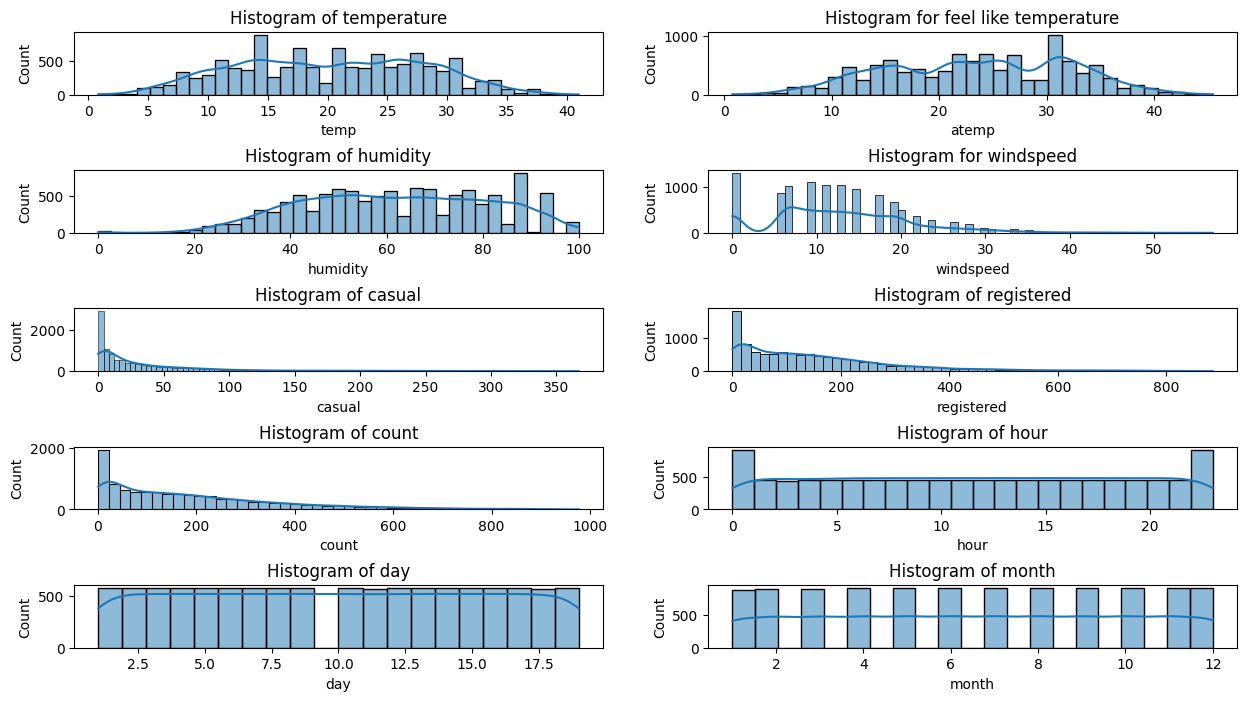

In [158]:
# distribution plots of all the continuous variable(s)
plt.figure(figsize=(15,8))

plt.subplot(5, 2, 1)
plt.title("Histogram of temperature")
sns.histplot(x=num_categorical_df['temp'], data=num_categorical_df, kde=True)

plt.subplot(5, 2, 2)
plt.title("Histogram for feel like temperature")
sns.histplot(x=num_categorical_df['atemp'],data=num_categorical_df, kde=True)


plt.subplot(5, 2, 3)
plt.title("Histogram of humidity")
sns.histplot(x=num_categorical_df['humidity'], data=num_categorical_df, kde=True)


plt.subplot(5, 2, 4)
plt.title("Histogram for windspeed")
sns.histplot(x=num_categorical_df['windspeed'],data=num_categorical_df, kde=True)


plt.subplot(5, 2, 5)
plt.title("Histogram of casual")
sns.histplot(x=num_categorical_df['casual'], data=num_categorical_df, kde=True)

plt.subplot(5, 2, 6)
plt.title("Histogram of registered")
sns.histplot(x=num_categorical_df['registered'], data=num_categorical_df, kde=True)

plt.subplot(5, 2, 7)
plt.title("Histogram of count")
sns.histplot(x=num_categorical_df['count'], data=num_categorical_df, kde=True)

plt.subplot(5, 2, 8)
plt.title("Histogram of hour")
sns.histplot(x=num_categorical_df['hour'], data=num_categorical_df, kde=True)

plt.subplot(5, 2, 9)
plt.title("Histogram of day")
sns.histplot(x=num_categorical_df['day'], data=num_categorical_df, kde=True)

plt.subplot(5, 2, 10)
plt.title("Histogram of month")
sns.histplot(x=num_categorical_df['month'], data=num_categorical_df, kde=True)

plt.subplots_adjust(hspace=1.2)
plt.show()

**Univariant:**

1. Temperature (temp) & Feel-like Temperature (atemp):

    Distribution Type: Nearly Normal (Bell-shaped).

    Observation: Most temperatures are between 10°C and 30°C, peaking around 20–25°C.

    This indicates that rides are commonly taken in moderate weather, which may help in planning optimal operating conditions.

2. Humidity:

    Distribution Type: Slightly Right-Skewed (positive skew).

    Observation: Majority of humidity values lie between 40% and 80%, with few extreme values.

    High humidity might affect rider comfort, so it may influence demand slightly.

3. Windspeed:

    Distribution Type: Right-Skewed.

    Observation: Most values are below 20, with a long tail stretching to higher values.

    Very low windspeed days are most common — extremely windy conditions are rare (and may reduce usage).

4. Casual Users (casual):

    Distribution Type: Highly Right-Skewed.

    Observation: Most casual usage values are low (under 50), indicating many short/occasional trips.

    Shows that casual users generally use the bikes less often and in smaller numbers.

5. Registered Users (registered):

    Distribution Type: Right-Skewed, but more spread out than casual.

    Observation: More frequent usage compared to casuals, often over 200+ rides in a time slot.

    Suggests consistent usage by registered users, key to business revenue.

6. Total Count (count):

    Distribution Type: Right-Skewed.

    Observation: Most ride counts are under 300, with a few extreme peaks.

    Shows high variability in demand depending on time and conditions.

7.  Hour:

    Distribution Type: Bimodal.

    Observation: Peaks arount 8 AM and 5-6 PM.

    Suggests usage during morning and evening hours.

8.  Day:

    Distribution Type: Uniform

    Observations: The values are evenly spread across all days.

    Each day has a similar number of entries.

9.  Month:

    Distribution Type: Uniform.

    Observations: Data is distributed evenly across all months.

    No seasonal data gaps.



**Business Implications:**

Right-skewed usage (especially for casual, registered, count) implies few high-demand periods, which are crucial for targeted marketing and resource allocation.

Normal distribution in temp/atemp shows users prefer moderate weather, so seasonal campaigns could be effective.

High usage around 8 - 9 PM and 5-6 PM suggests users are commuting to and from work or school. More bikes should be made available during these time to avoid shortage.

There is stable usage throughout day / month indicates that the service is not heavily seasonal.

Understanding these patterns can help optimize vehicle distribution, pricing, and staffing.

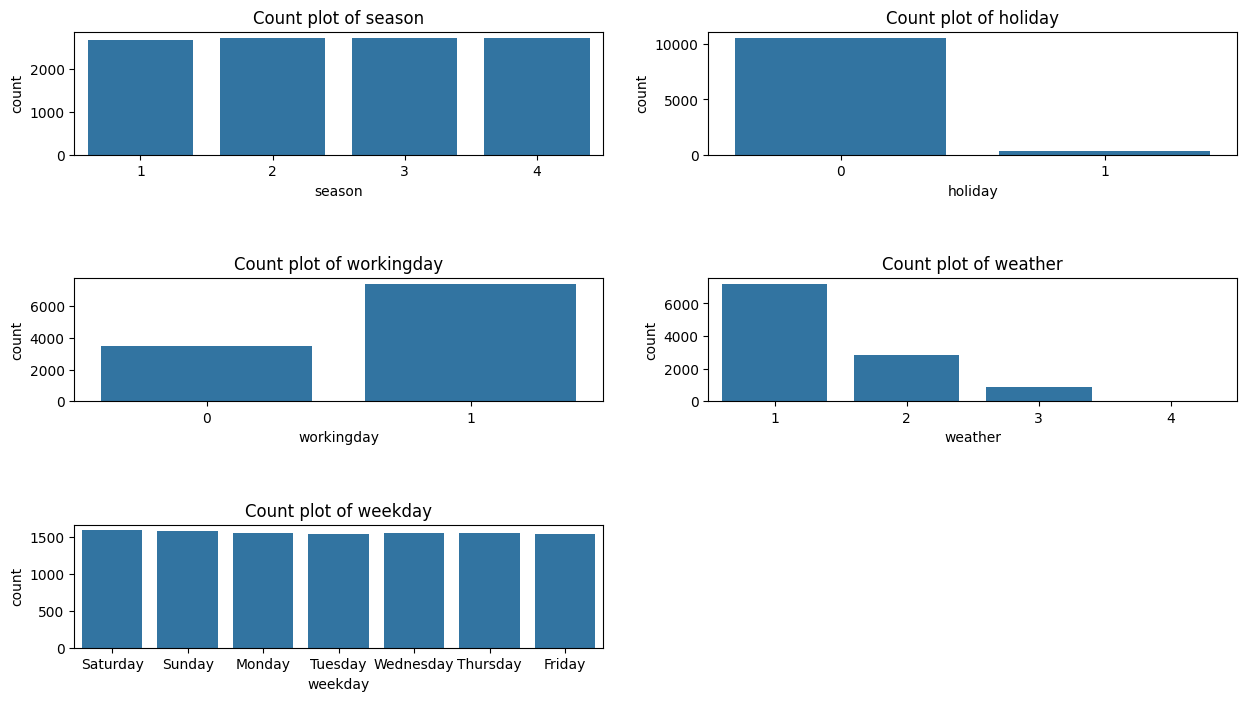

In [159]:
# countplots of all the categorical variables
plt.figure(figsize=(15,8))

plt.subplot(3, 2, 1)
plt.title("Count plot of season")
sns.countplot(x=num_categorical_df['season'], data=num_categorical_df)

plt.subplot(3, 2, 2)
plt.title("Count plot of holiday")
sns.countplot(x=num_categorical_df['holiday'], data=num_categorical_df)

plt.subplot(3, 2, 3)
plt.title("Count plot of workingday")
sns.countplot(x=num_categorical_df['workingday'], data=num_categorical_df)

plt.subplot(3, 2, 4)
plt.title("Count plot of weather")
sns.countplot(x=num_categorical_df['weather'], data=num_categorical_df)

plt.subplot(3, 2, 5)
plt.title("Count plot of weekday")
sns.countplot(x=num_categorical_df['weekday'], data=num_categorical_df)

plt.subplots_adjust(hspace=1.0)
plt.show()

**Univariant Insights and business implications:**
1. Season

**Insights:** The ride counts are almost evenly distributed across all four seasons.

**Business Implication:** There’s no strong seasonal drop in demand, so bike availability and operations can remain relatively stable throughout the year.

2. Holiday

**Insights:** Most data points are for non-holidays (value 0); holidays are very few.

**Business Implication:** Since holidays are rare in the data, business planning should focus more on regular days. Special promotions on holidays may not impact overall performance much.

**Note:**

 The holiday column refers to official public holidays only (e.g., national holidays like Independence Day).

These are relatively rare in a year (around 10–12 days).

That's why the count is low for holidays.

3. Working Day

**Insights:** Higher count on working days compared to non-working days.

**Business Implication:** Bike demand is higher on working days, indicating commuters use the service more for daily work travel. Ensure good availability on weekdays, especially during rush hours.

4. Weather

**Insights:** Most days have weather type 1 (Clear to partly cloudy). Count drops significantly in worse weather conditions (2, 3, 4).

**Business Implication:** Poor weather significantly affects demand. On rainy or snowy days, expect fewer rides. Plan maintenance and resource allocation accordingly.

5. Weekday

**Insights:** The number of rides is fairly consistent across all days of the week.

**Business Implication:** No specific weekday stands out. Daily operations and staff allocation can be kept uniform across the week.

**Note:**

A Saturday or Sunday is not marked as a holiday in the holiday column unless it is a special public holiday.

So, weekends are typically counted as workingday = 0, but not as holiday = 1.



In [160]:
num_categorical_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,Saturday


In [161]:
num_categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int32         
 13  day         10886 non-null  int32         
 14  month       10886 non-null  int32         
 15  weekday     10886 non-null  object        
dtypes: category(4), dateti

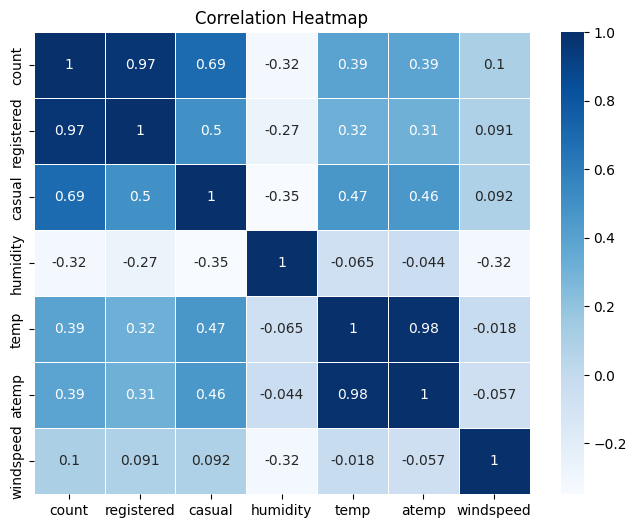

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns
numeric_cols = ['count', 'registered', 'casual', 'humidity']

# Optional: add more like temp, windspeed if available
numeric_cols += ['temp', 'atemp', 'windspeed']

# Compute correlation matrix
corr = df_org[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Insights and Business Implications:
  * A correlation heatmap was used to identify relationships among numerical variables affecting cycle rentals. Key observations include:
    * Registered users show a very strong positive correlation (0.97) with total rentals (count), indicating that registered users are the primary drivers of business. Strategies like loyalty rewards or membership incentives can further enhance engagement and boost usage.
    * Casual users also have a strong positive correlation (0.69) with total rentals, suggesting that seasonal promotions or holiday offers can be effective in attracting this segment.
    * Humidity shows a moderate negative correlation with total rentals (-0.32) and with casual users (-0.35), implying that weather plays a role in user behavior, especially among non-committed riders. Marketing offers or protective gear provisions could help mitigate this dip in demand during humid days.
    * Temperature (temp) and apparent temperature (atemp) are almost perfectly correlated (0.98), indicating redundancy. For modeling purposes, one of these variables may be dropped to avoid multicollinearity.
    * Windspeed has a weak correlation with rentals (0.10) and may not significantly influence user decisions under normal weather conditions.

* Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.

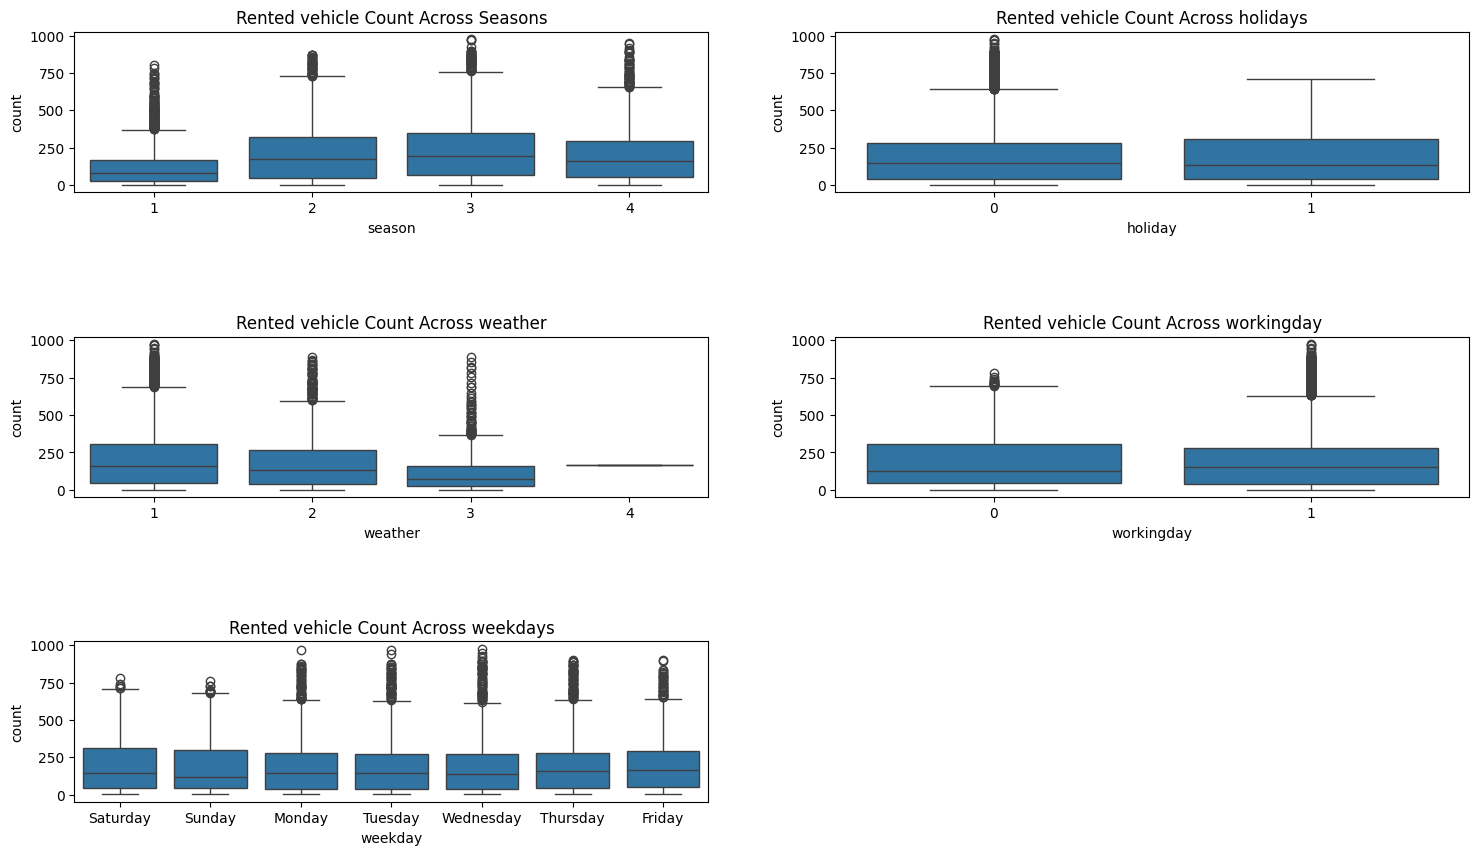

In [163]:
plt.figure(figsize=(18,10))

plt.subplot(3, 2, 1)
plt.title("Rented vehicle Count Across Seasons")
sns.boxplot(x = num_categorical_df['season'], y = num_categorical_df['count'], data = num_categorical_df)

plt.subplot(3, 2, 2)
plt.title("Rented vehicle Count Across holidays")
sns.boxplot(x = num_categorical_df['holiday'], y = num_categorical_df['count'], data = num_categorical_df)


plt.subplot(3, 2, 3)
plt.title("Rented vehicle Count Across weather")
sns.boxplot(x = num_categorical_df['weather'], y = num_categorical_df['count'], data = num_categorical_df)


plt.subplot(3, 2, 4)
plt.title("Rented vehicle Count Across workingday")
sns.boxplot(x = num_categorical_df['workingday'], y = num_categorical_df['count'], data = num_categorical_df)


plt.subplot(3, 2, 5)
plt.title("Rented vehicle Count Across weekdays")
sns.boxplot(x = num_categorical_df['weekday'], y = num_categorical_df['count'], data = num_categorical_df)



plt.subplots_adjust(hspace=0.9)
plt.show()

####1.Season
Category:
1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter

* **Insights:**

  * Highest rental counts are seen during Fall (3) and Summer (2).

  * Spring (1) may have lower average rentals per day.

  * We expected winter (cold weather) to lower rentals, but the plot shows rental counts similar to fall and summer. No sharp drop distribution and median are relatively stable.

* **Business Insight:**

  * Operational Planning: Focus on fleet expansion, maintenance, and marketing during summer and fall to meet demand.

  * Promotions: Offer discounts or loyalty bonuses in winter to attract riders.

  * Event Campaigns: Run season-based campaigns to increase visibility.

####2.Holiday

Category:
0 = Not a Holiday, 1 = Holiday

* **Insights:**

  * Rentals are generally higher on non-holidays (0).

  * Drop in usage on holidays, suggesting many users rent bikes for commute purposes.

* **Business Insight:**

  * Targeting Commuters: Design commuter-oriented passes/subscriptions for regular days.

  * Holiday Campaigns: On holidays, pivot towards tourists or leisure riders. Offer family packages, hourly deals, or tie-ins with tourist attractions.

####3.Working Day
Category:
0 = Weekend/Holiday, 1 = Regular Working Day

* **Insights:**

  * Higher median rentals on working days (1).

  * This supports the idea that bikes are heavily used for commuting.

* **Business Insight:**

  * Promote monthly commuter passes, office partnerships, or bike-to-work schemes.

  * For weekends, change messaging to appeal to leisure riders: “Weekend Ride and Relax.”

####4.Weather
Category:
1 = Clear, 2 = Mist/Cloudy, 3 = Light Rain/Snow, 4 = Severe Weather

* **Insights:**

  * Clear weather (1) has the highest rentals.

  * Rentals gradually decrease as weather worsens.

Very low usage during weather type 4 (heavy rain, fog, etc.).

* **Business Insight:**

  * Use weather forecasts to predict demand and adjust bike supply dynamically.

  * Alert users about conditions via app.

  * Offer safety gear (raincoats, helmet covers).

  * Consider insurance or ride cancellation protection in case of sudden weather changes.

####5.Weekday

* **Insights:**

  * Weekdays (Mon–Fri) have slightly higher rentals, peaking on Tuesday–Thursday.

  * Saturday and Sunday still show decent activity, likely from leisure riders.

* **Business Insight:**

  * Weekday Strategy: Reinforce commuter incentives—“Ride to Office” plans.

  * Weekend Strategy: Tie-ups with cafes, parks, or tourist hotspots for exclusive ride + experience packages.



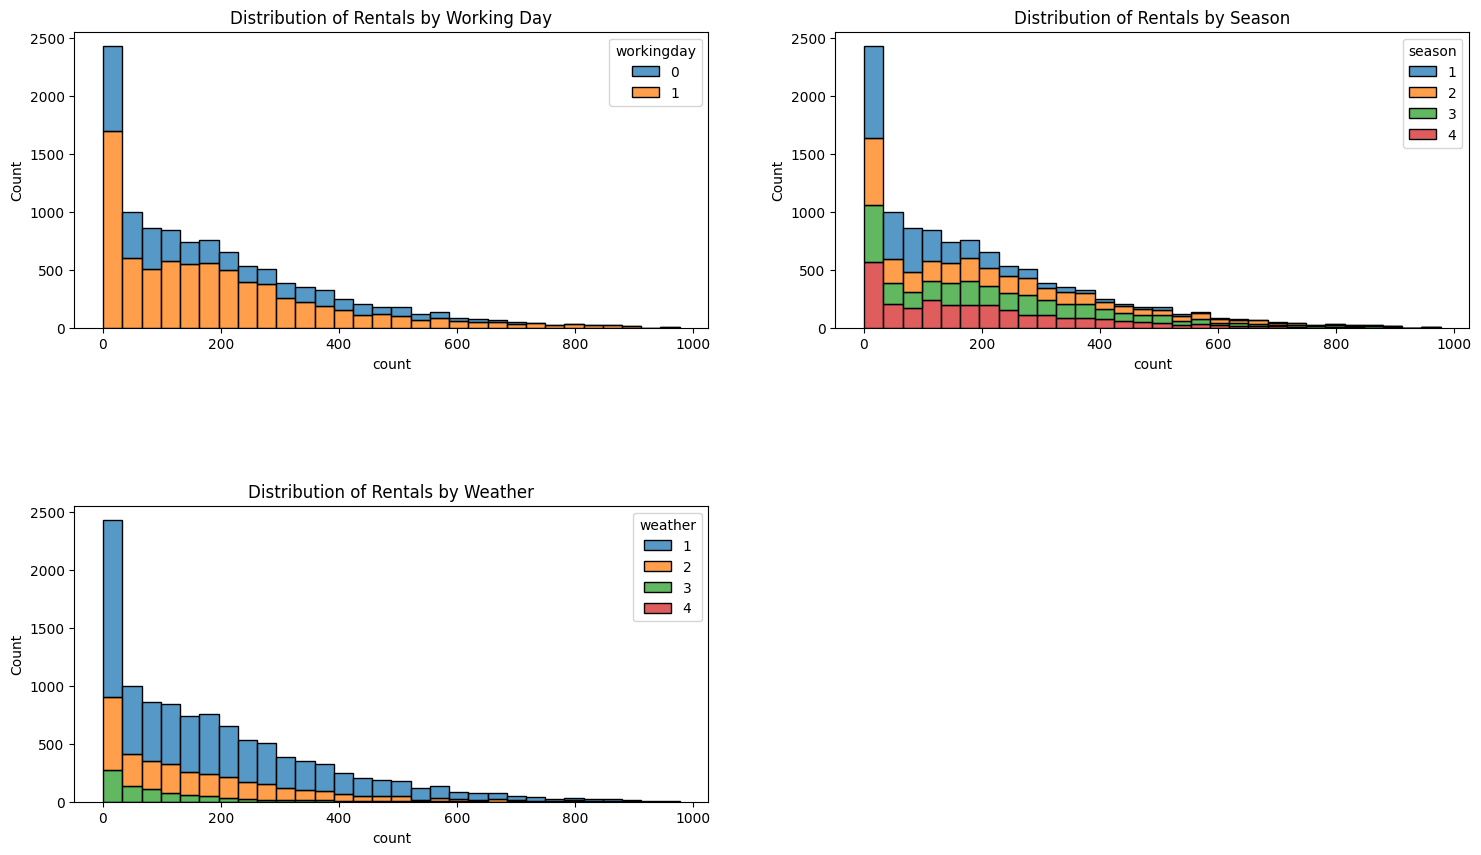

In [164]:
plt.figure(figsize=(18,10))

plt.subplot(2, 2, 1)
plt.title("Distribution of Rentals by Working Day")
sns.histplot(data=num_categorical_df, x="count", bins=30, hue="workingday", multiple="stack")

plt.subplot(2, 2, 2)
plt.title("Distribution of Rentals by Season")
sns.histplot(data=num_categorical_df, x="count", bins=30, hue="season", multiple="stack")

plt.subplot(2, 2, 3)
plt.title("Distribution of Rentals by Weather")
sns.histplot(data=num_categorical_df, x="count", bins=30, hue="weather", multiple="stack")

plt.subplots_adjust(hspace=0.6)
plt.show()

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

**Observation for Distribution of Rentals by Working Day:**

Rentals are higher on working days (workingday = 1).

Distribution is positively skewed: more rentals are concentrated between 100–400 counts on working days.

Non-working days (workingday = 0) have fewer high-count instances, indicating less demand.

**Business Insight:**

Peak demand occurs on working days, likely due to office commuters using Yulu for first-mile/last-mile transport.

**Observation for Distribution of Rentals by Season:**

Season 1 (Spring) shows the highest overall count of rentals across bins.

Seasons 2 (Summer) and 3 (Fall) show moderate rental counts.

Season 4 (Winter) has relatively fewer rentals but still contributes across the distribution.

**Business Insight:**

Focus marketing efforts heavily during Spring—it’s the peak opportunity to onboard new users and promote premium plans.

Leverage seasonality-based pricing and fleet movement strategies to balance demand and avoid resource underutilization.

**Observation Distribution of Rentals by Weather:**

Weather = 1 (Clear, partly cloudy) dominates rental counts—predictable and stable demand.

As weather worsens (weather codes 2, 3, 4), rental counts drop drastically.

Weather = 4 (Heavy rain/snow) sees almost negligible rentals.

**Business Insight:**

Bad weather is a significant deterrent for cycle rentals.

Most demand occurs in pleasant or tolerable weather conditions.

### Illustrate the insights based on EDA

#### Comments on range of attributes, outliers of various attributes
* Range of Attributes:
  * Count: Ranges from 1 to 977 rentals per hour, showing high variability in demand.
  * Registered Users: Varies between 0 and 886, with a high average, confirming that registered users contribute significantly to the total count.

  * Casual Users: Range is 0 to 367, lower than registered users, which aligns with their less frequent usage.

  * Humidity: Spans from 0% to 100%, covering the full environmental spectrum. Values close to 0 might indicate sensor errors or missing data.

  * Temperature (temp) and Apparent Temperature (atemp): Both range approximately from -16°C to 41°C (normalized). These attributes are strongly correlated.

  * Windspeed: Ranges from 0 to 67 (normalized units), but shows weak correlation with demand.
* Outlier:
  * Using IQR, approximately 300 outliers were identified and capped for robustness testing.

  * Using Z-score, around 147 outliers were identified (values with z-score > 3 or < -3).

  * Most outliers are extreme high values, indicating sudden spikes in demand, possibly during holidays, events, or weekends.

  * Casual and Registered Users: Show several outliers on the higher end, again reflecting event-based or weather-related usage surges.

  * Humidity and Windspeed: Contain minor outliers, but the impact on the target variable is low. Some zero values might be data quality issues.

  * Temperature: No major outliers detected; the values lie mostly within expected seasonal ranges.

#### Comments on the distribution of the variables and relationship between them
Distribution of Variables:

* Count (Total Rentals):
  *  Right-skewed distribution with a long tail toward higher values.
  *  Indicates most hours have low to moderate rentals, with a few hours experiencing very high demand.
  *  Not normally distributed (confirmed through histogram and Q-Q plot).
* Casual vs Registered Users:
  * Both distributions are right-skewed, with registered users contributing more to total rentals on average.
  * Casual users show greater variability, possibly due to weather, weekends, or holidays.
* Humidity:
  * Appears uniformly or left-skewed with a peak near high humidity values.
  * A few extremely low values may indicate sensor errors or missing values.
* Temperature & Apparent Temperature:
  * Nearly normal distribution.
  * Both are highly correlated (correlation coefficient ≈ 0.98), indicating similar behavior.
* Windspeed:
  * Shows a flat or slightly skewed distribution.

Relationship Between Variables:
* High Positive Correlation:
  * Count vs Registered Users (0.97): Suggests that the majority of rentals are driven by registered users.
  * Count vs Casual Users (0.69): Moderate correlation, likely influenced by day-type, weather, or season.
  * Temp vs Atemp (0.98): Very strong linear relationship as expected.
* Moderate/Low Correlation:
  * Humidity vs Count (-0.32): Weak negative correlation, indicating higher humidity slightly reduces cycle rentals.
  * Windspeed vs Count (0.10): Very weak correlation, indicating little to no effect of windspeed on rentals.
* Insights from Heatmap:
  * No signs of multicollinearity except for temp and atemp.
  * Strong correlations give insights into key drivers of demand (e.g., temperature, registered users).
  * Weak correlations with weather factors indicate external conditions have less influence compared to user type.

#### Comments for each univariate and bivariate plots
* Univariate:
  * The ride counts are almost evenly distributed across all four seasons.
  * Most data points are for non-holidays (value 0); holidays are very few
  * Higher count on working days compared to non-working days.
  * Most days have weather type 1 (Clear to partly cloudy). Count drops significantly in worse weather conditions (2, 3, 4)
  * The number of rides is fairly consistent across all days of the week.
* Bivariate:
  * Highest rental counts are seen during Fall (3) and Summer (2)
  * We expected winter (cold weather) to lower rentals, but the plot shows rental counts similar to fall and summer. No sharp drop distribution and median are relatively stable.
  * Higher median rentals on working days (1). This supports the idea that bikes are heavily used for commuting
  * Clear weather (1) has the highest rentals.
  * Very low usage during weather type 4 (heavy rain, fog, etc.)
  * Weekdays (Mon–Fri) have slightly higher rentals, peaking on Tuesday–Thursday
  * Season 1 (Spring) shows the highest overall count of rentals across bins.
  * Seasons 2 (Summer) and 3 (Fall) show moderate rental counts.
  * Season 4 (Winter) has relatively fewer rentals but still contributes across the distribution
  * Weather = 4 (Heavy rain/snow) sees almost negligible rentals
  * Weather = 1 (Clear, partly cloudy) dominates rental counts—predictable and stable demand

### 2. Hypothesis Testing

#### 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

**Hypothesis Formulation:**
  * Set up Null Hypothesis (H0):
    * There is no difference in the average number of cycles rented between working days and non-working days.
  * Set up Alternate Hypothesis (Ha):
    * There is a difference in the average number of cycles rented.

Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
   *  Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

##### Original dataframe (Without Outlier treatment)

   *  **Check test Assumptions:** Normality for Histogram and Q-Q Plot

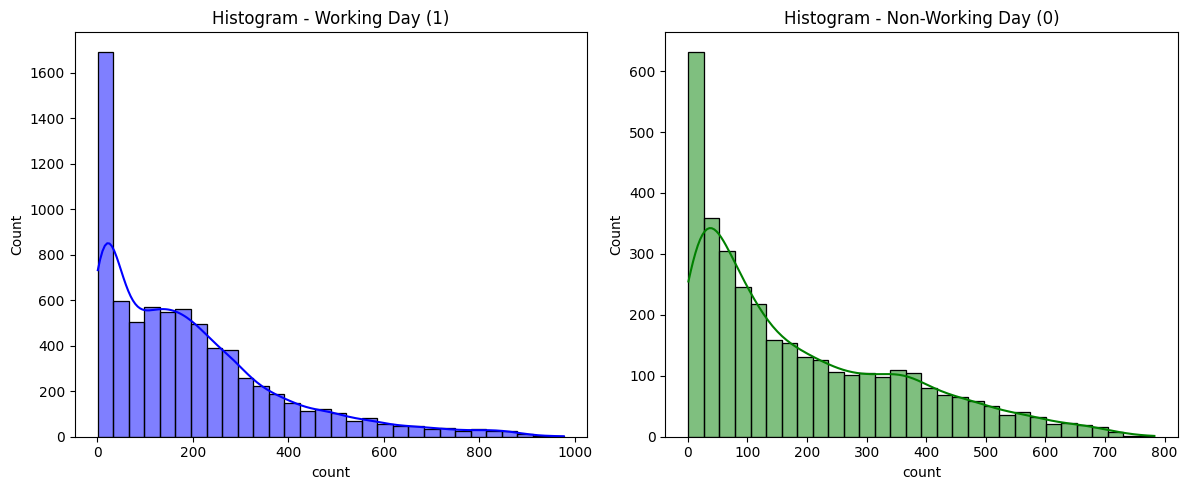

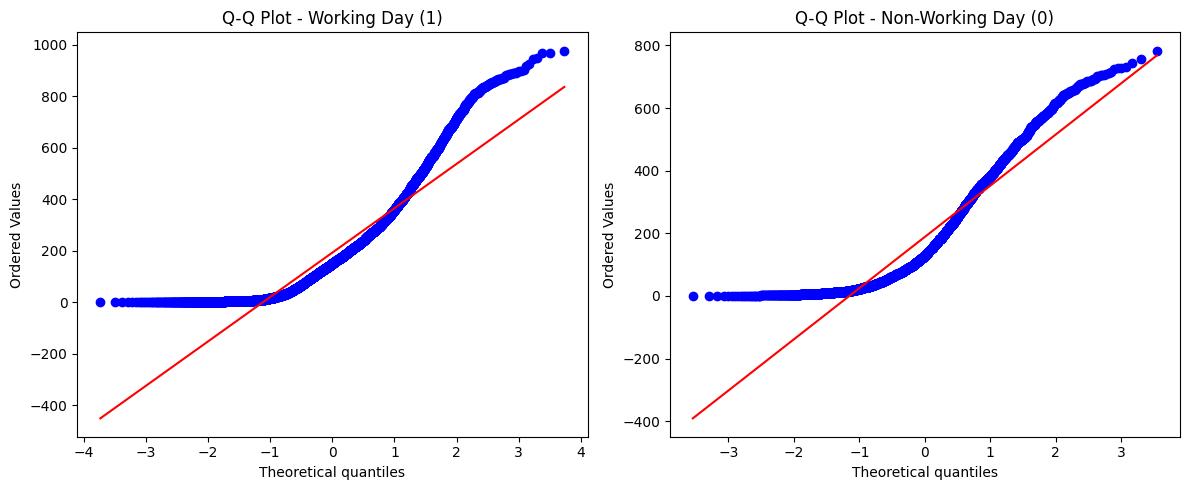

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
workingday_1 = df_org[df_org['workingday'] == 1]['count']
workingday_0 = df_org[df_org['workingday'] == 0]['count']

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(workingday_1, kde=True, bins=30, color='blue')
plt.title('Histogram - Working Day (1)')

plt.subplot(1, 2, 2)
sns.histplot(workingday_0, kde=True, bins=30, color='green')
plt.title('Histogram - Non-Working Day (0)')

plt.tight_layout()
plt.show()

# Q-Q Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(workingday_1, dist="norm", plot=plt)
plt.title("Q-Q Plot - Working Day (1)")

plt.subplot(1, 2, 2)
stats.probplot(workingday_0, dist="norm", plot=plt)
plt.title("Q-Q Plot - Non-Working Day (0)")

plt.tight_layout()
plt.show()

   *  **Check test Assumptions:** Levene’s Test to Check for Equal Variance

In [166]:
from scipy.stats import levene

stat, p_value = levene(workingday_1, workingday_0)
print(f"Levene’s Test p-value: {p_value:.5f}")

Levene’s Test p-value: 0.94378


*  Set a significance level (alpha) = 0.05

Since p-value: 0.94378 > Significance level 0.05, therefore Equal variances assumed

*  **TTest :** Calculate test Statistics

In [199]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(workingday_1, workingday_0, equal_var=True)
print(f"tstat = {t_stat}, p_val = {p_val}")
if p_val < 0.05:
  print(f'Reject null hypothesis : There is a difference in the average number of cycles rented')
else:
  print(f'Failed to Reject null hypothesis : There is no difference in the average number of cycles rented between working days and non-working days.')

tstat = 1.2096277376026694, p_val = 0.22644804226361348
Failed to Reject null hypothesis : There is no difference in the average number of cycles rented between working days and non-working days.


*  Decision to accept or reject null hypothesis.
  * The p_value 0.22 is much greater than 0.05, so we fail to reject the null hypothesis  

* Inference from the analysis
  * There is no statistically significant difference in the average number of electric cycles rented between working days and non-working days.
  
  * This suggests that being a working day does not have a strong influence on rental demand — users may be renting similarly regardless of whether it's a workday or not.

##### Capped dataframe (With Outlier treatment)

   *  **Check test Assumptions:** Normality for Histogram and Q-Q Plot

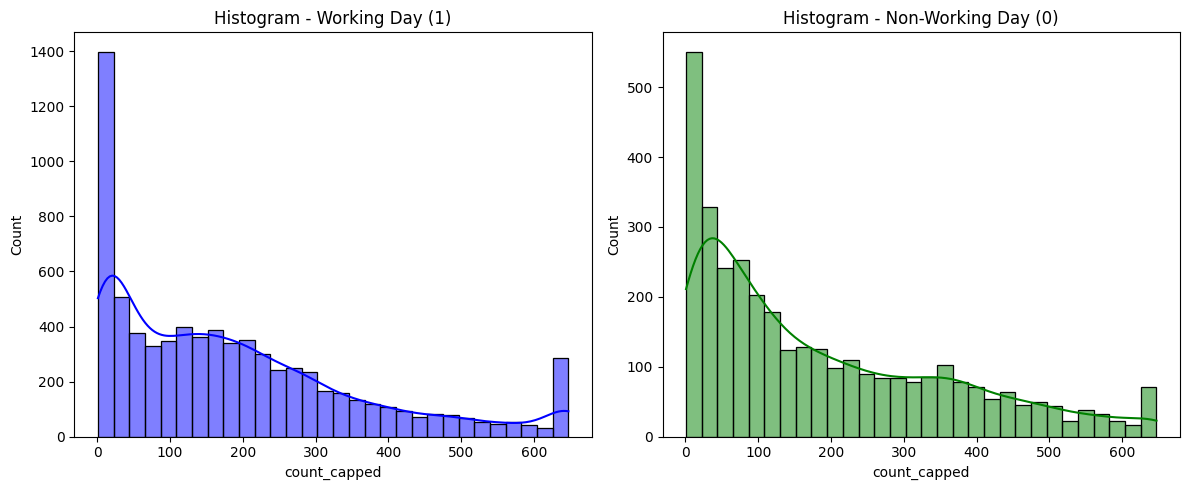

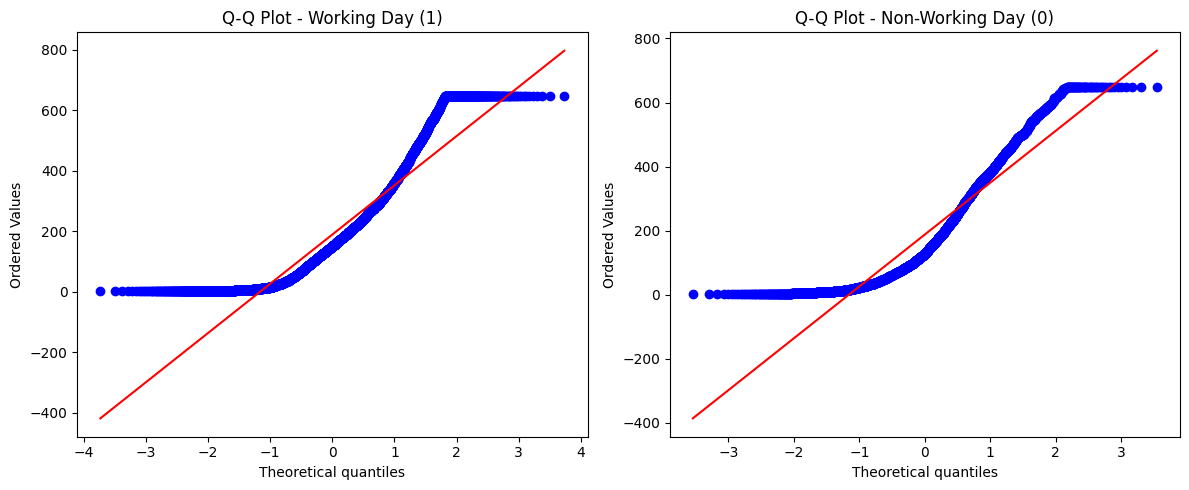

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
workingday__1 = df_copy_iqr[df_copy_iqr['workingday'] == 1]['count_capped']
workingday__0 = df_copy_iqr[df_copy_iqr['workingday'] == 0]['count_capped']

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(workingday__1, kde=True, bins=30, color='blue')
plt.title('Histogram - Working Day (1)')

plt.subplot(1, 2, 2)
sns.histplot(workingday__0, kde=True, bins=30, color='green')
plt.title('Histogram - Non-Working Day (0)')

plt.tight_layout()
plt.show()

# Q-Q Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(workingday__1, dist="norm", plot=plt)
plt.title("Q-Q Plot - Working Day (1)")

plt.subplot(1, 2, 2)
stats.probplot(workingday__0, dist="norm", plot=plt)
plt.title("Q-Q Plot - Non-Working Day (0)")

plt.tight_layout()
plt.show()

   *  **Check test Assumptions:** Levene’s Test to Check for Equal Variance

In [200]:
from scipy.stats import levene

stat, p_value = levene(workingday__1, workingday__0)
print(f"Levene’s Test p-value: {p_value:.5f}")

Levene’s Test p-value: 0.13747


*  Set a significance level (alpha) = 0.05

Since p-value: 0.13747 > Significance level 0.05, therefore Equal variances assumed

*  **TTest:** Calculate test Statistics

In [201]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(workingday__1, workingday__0, equal_var=True)
print(f"tstat = {t_stat}, p_val = {p_val}")
if p_val < 0.05:
  print(f'Reject null hypothesis : There is a difference in the average number of cycles rented')
else:
  print(f'Failed to Reject null hypothesis : There is no difference in the average number of cycles rented between working days and non-working days.')

tstat = 0.3163260408231243, p_val = 0.7517611135576576
Failed to Reject null hypothesis : There is no difference in the average number of cycles rented between working days and non-working days.


*  Decision to accept or reject null hypothesis.
  * The p_value 0.7517 is much greater than 0.05, so we fail to reject the null hypothesis  

* Inference from the analysis
  * There is no statistically significant difference in the average number of electric cycles rented between working days and non-working days.
  
  * This suggests that being a working day does not have a strong influence on rental demand — users may be renting similarly regardless of whether it's a workday or not.

##### Final Interpretation
In both original and capped datasets:

There is no statistically significant difference in average cycle rentals between working and non-working days.

This conclusion is robust to outlier treatment.

Hence, “Working Day” does not have a significant impact on the number of electric cycles rented.

#### ANNOVA to check if No. of cycles rented is similar or different in different season

**Hypothesis Formulation:**
   * Set up Null Hypothesis (H0):
    * There is no significant difference in cycle rentals between seasons.
   * Alternate Hypothesis (Ha):
    * At least one season has significantly different average rentals.

Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
   *  Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

##### Original dataframe (Without Outlier treatment)

   *  **Check test Assumptions:** Normality for Histogram and Q-Q Plot

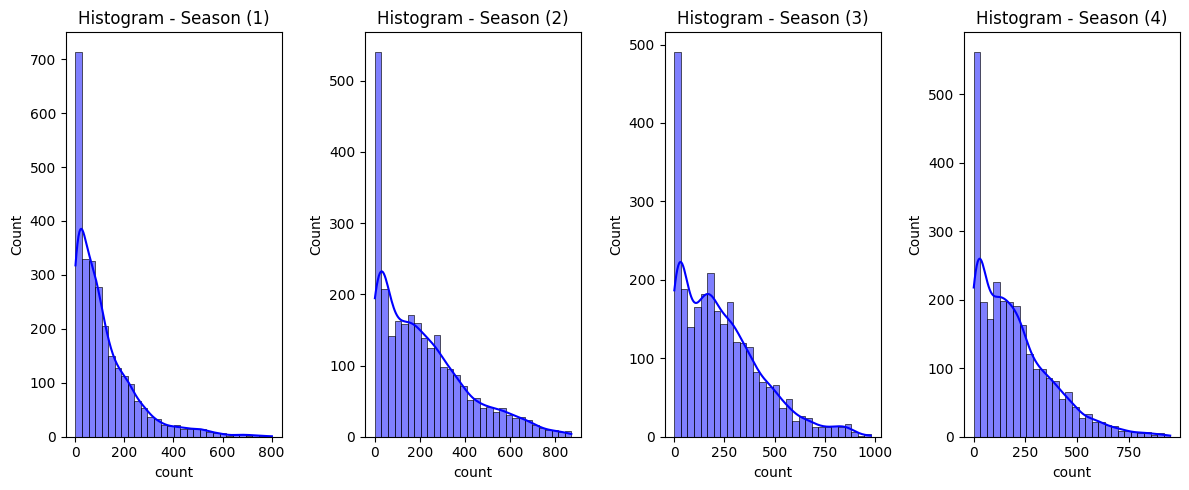

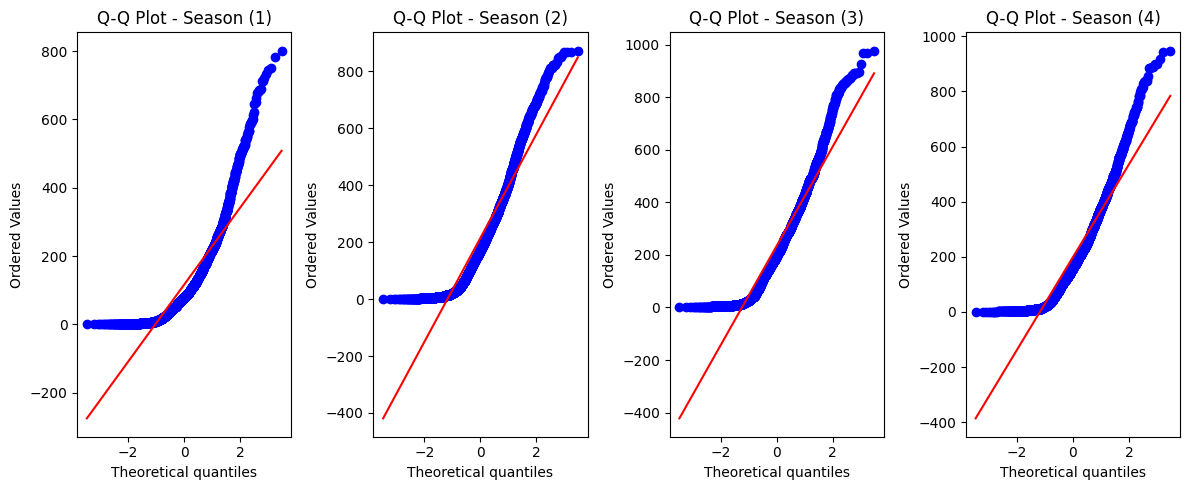

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
season_1 = df_org[df_org['season'] == 1]['count']
season_2 = df_org[df_org['season'] == 2]['count']
season_3 = df_org[df_org['season'] == 3]['count']
season_4 = df_org[df_org['season'] == 4]['count']

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
sns.histplot(season_1, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (1)')

plt.subplot(1, 4, 2)
sns.histplot(season_2, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (2)')

plt.subplot(1, 4, 3)
sns.histplot(season_3, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (3)')

plt.subplot(1, 4, 4)
sns.histplot(season_4, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (4)')

plt.tight_layout()
plt.show()

# Q-Q Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
stats.probplot(season_1, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (1)")

plt.subplot(1, 4, 2)
stats.probplot(season_2, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (2)")

plt.subplot(1, 4, 3)
stats.probplot(season_3, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (3)")

plt.subplot(1, 4, 4)
stats.probplot(season_4, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (4)")

plt.tight_layout()
plt.show()

   *  **Check test Assumptions:** Levene’s Test to Check for Equal Variance

In [210]:
from scipy.stats import levene

stat, p_value = levene(season_1, season_2, season_3, season_4)
print(f"Levene’s Test p-value: {p_value:}")

Levene’s Test p-value: 1.0147116860043298e-118


*  Set a significance level (alpha) = 0.05

Since p-value: 1.0147116860043298e-118 < Significance level 0.05, therefore Variance are not Equal

Note: Despite violation of assumptions, proceeded with one-way ANOVA as instructed in the case-study.

*  **ANNOVA :** Calculate test Statistics

In [211]:
from scipy.stats import f_oneway

# Group the 'count' values by each season
season_1 = df_org[df_org['season'] == 1]['count']
season_2 = df_org[df_org['season'] == 2]['count']
season_3 = df_org[df_org['season'] == 3]['count']
season_4 = df_org[df_org['season'] == 4]['count']

# Apply One-Way ANOVA
f_stat, p_value = f_oneway(season_1, season_2, season_3, season_4)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one season has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between seasons.')

ANOVA F-statistic: 236.94671081032106
p-value: 6.164843386499654e-149
Reject null hypothesis : At least one season has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 6.164843386499654e-149 is much smaller than 0.05, so we reject the null hypothesis by saying At least one season has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one season has a different average number of cycle rentals compared to the others.

Also validating the findings using non-parametric Kruskal-Wallis test (as robustness check).
  * **Kruskal-Wallis H-test :** Calculate test Statistics

In [212]:
from scipy.stats import kruskal

# Group the 'count' values by 'season'
season_1 = df_org[df_org['season'] == 1]['count']
season_2 = df_org[df_org['season'] == 2]['count']
season_3 = df_org[df_org['season'] == 3]['count']
season_4 = df_org[df_org['season'] == 4]['count']

# Perform the Kruskal-Wallis H-test
stat, p_value = kruskal(season_1, season_2, season_3, season_4)

print("Kruskal-Wallis Test Statistic:", stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one season has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between seasons.')

Kruskal-Wallis Test Statistic: 699.6668548181988
p-value: 2.479008372608633e-151
Reject null hypothesis : At least one season has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 2.479008372608633e-151 is much smaller than 0.05, so we reject the null hypothesis by saying At least one season has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one season has a different average number of cycle rentals compared to the others.

**Observations:**

* Both **Annova** and **Kruskal** test give same result i.e **p-value < 0.05, Conclusion is to Reject Null Hypothesis**

**Conclusion:**

Since the p-value < 0.05, we reject the null hypothesis.

There is statistically significant evidence to suggest that at least one season has a different average number of cycle rentals compared to the others.

**Business Implications:**

**Strategic planning should be seasonal:**

* Increase fleet availability, marketing, and operational staff in high-demand seasons

* Optimize costs during low-demand seasons by reducing fleet, storage, or promotions.

**Marketing & Pricing Strategy:**

* Tailor discounts or pricing strategies based on expected seasonal demand. For example, offer promotions in low-demand seasons to improve utilization.

**Product Improvements:**

* Seasonality might correlate with weather or festival patterns, so product design (like rain protection, battery capacity) can be optimized accordingly.

##### Capped dataframe (With Outlier treatment)

   *  **Check test Assumptions:** Normality for Histogram and Q-Q Plot

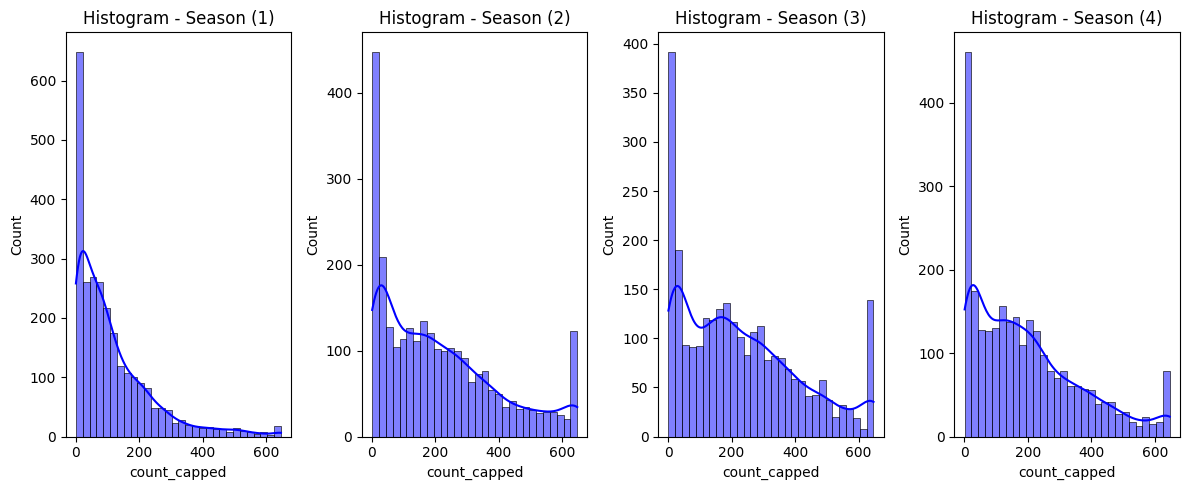

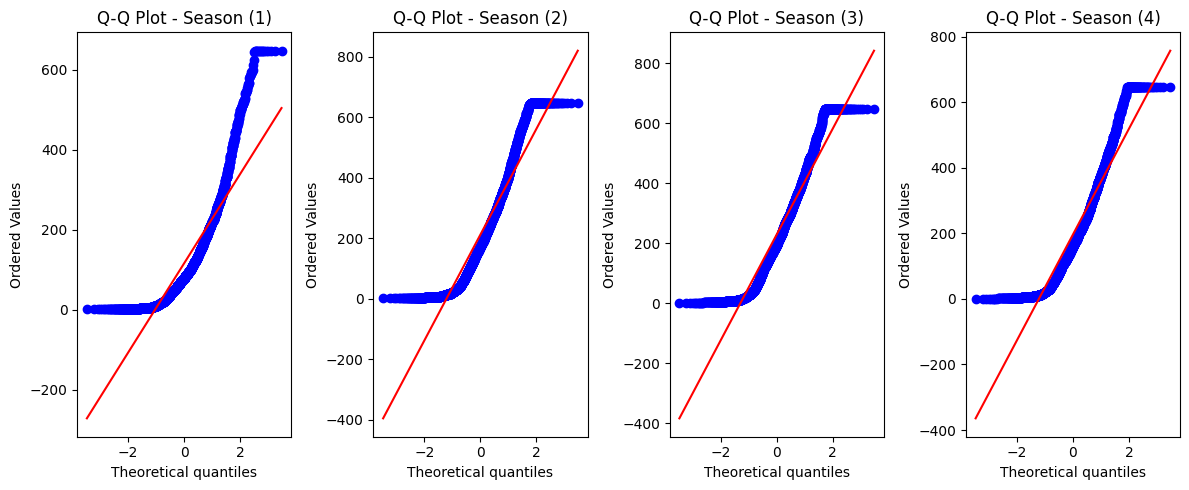

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
season__1 = df_copy_iqr[df_copy_iqr['season'] == 1]['count_capped']
season__2 = df_copy_iqr[df_copy_iqr['season'] == 2]['count_capped']
season__3 = df_copy_iqr[df_copy_iqr['season'] == 3]['count_capped']
season__4 = df_copy_iqr[df_copy_iqr['season'] == 4]['count_capped']

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
sns.histplot(season__1, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (1)')

plt.subplot(1, 4, 2)
sns.histplot(season__2, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (2)')

plt.subplot(1, 4, 3)
sns.histplot(season__3, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (3)')

plt.subplot(1, 4, 4)
sns.histplot(season__4, kde=True, bins=30, color='blue')
plt.title('Histogram - Season (4)')

plt.tight_layout()
plt.show()

# Q-Q Plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
stats.probplot(season__1, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (1)")

plt.subplot(1, 4, 2)
stats.probplot(season__2, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (2)")

plt.subplot(1, 4, 3)
stats.probplot(season__3, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (3)")

plt.subplot(1, 4, 4)
stats.probplot(season__4, dist="norm", plot=plt)
plt.title("Q-Q Plot - Season (4)")

plt.tight_layout()
plt.show()

   *  **Check test Assumptions:** Levene’s Test to Check for Equal Variance

In [214]:
from scipy.stats import levene

stat, p_value = levene(season__1, season__2, season__3, season__4)
print(f"Levene’s Test p-value: {p_value:}")

Levene’s Test p-value: 5.7233179707619984e-126


*  Set a significance level (alpha) = 0.05

Since p-value: 5.7233179707619984e-126 < Significance level 0.05, therefore Variance are not Equal

Note: Despite violation of assumptions, proceeded with one-way ANOVA as instructed in the case-study.

*  **ANNOVA :** Calculate test Statistics

In [216]:
from scipy.stats import f_oneway

# Group the 'count' values by each season
season__1 = df_copy_iqr[df_copy_iqr['season'] == 1]['count_capped']
season__2 = df_copy_iqr[df_copy_iqr['season'] == 2]['count_capped']
season__3 = df_copy_iqr[df_copy_iqr['season'] == 3]['count_capped']
season__4 = df_copy_iqr[df_copy_iqr['season'] == 4]['count_capped']

# Apply One-Way ANOVA
f_stat, p_value = f_oneway(season__1, season__2, season__3, season__4)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one season has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between seasons.')

ANOVA F-statistic: 243.33766355201303
p-value: 7.771506553957677e-153
Reject null hypothesis : At least one season has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 7.771506553957677e-153 is much smaller than 0.05, so we reject the null hypothesis by saying At least one season has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one season has a different average number of cycle rentals compared to the others.

Also validating the findings using non-parametric Kruskal-Wallis test (as robustness check).
  * **Kruskal-Wallis H-test :** Calculate test Statistics

In [217]:
from scipy.stats import kruskal

# Group the 'count' values by 'season'
season_1 = df_copy_iqr[df_copy_iqr['season'] == 1]['count_capped']
season_2 = df_copy_iqr[df_copy_iqr['season'] == 2]['count_capped']
season_3 = df_copy_iqr[df_copy_iqr['season'] == 3]['count_capped']
season_4 = df_copy_iqr[df_copy_iqr['season'] == 4]['count_capped']

# Perform the Kruskal-Wallis H-test
stat, p_value = kruskal(season__1, season__2, season__3, season__4)

print("Kruskal-Wallis Test Statistic:", stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one season has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between seasons.')

Kruskal-Wallis Test Statistic: 699.2817665514561
p-value: 3.0045514163996123e-151
Reject null hypothesis : At least one season has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 3.0045514163996123e-151 is much smaller than 0.05, so we reject the null hypothesis by saying At least one season has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one season has a different average number of cycle rentals compared to the others.

**Observations:**

* Both **Annova** and **Kruskal** test give same result i.e **p-value < 0.05, Conclusion is to Reject Null Hypothesis**

**Conclusion:**

Since the p-value < 0.05, we reject the null hypothesis.

There is statistically significant evidence to suggest that at least one season has a different average number of cycle rentals compared to the others.

**Business Implications:**

**Strategic planning should be seasonal:**

* Increase fleet availability, marketing, and operational staff in high-demand seasons

* Optimize costs during low-demand seasons by reducing fleet, storage, or promotions.

**Marketing & Pricing Strategy:**

* Tailor discounts or pricing strategies based on expected seasonal demand. For example, offer promotions in low-demand seasons to improve utilization.

**Product Improvements:**

* Seasonality might correlate with weather or festival patterns, so product design (like rain protection, battery capacity) can be optimized accordingly.

##### Final Interpretation
In both original and capped datasets:

There is statistically significant evidence to suggest that at least one season has a different average number of cycle rentals compared to the others.

This conclusion is robust to outlier treatment.

Hence, “season” has a significant impact on the number of electric cycles rented.

#### ANNOVA to check if No. of cycles rented is similar or different in different weather

**Hypothesis Formulation:**  

  * Set up Null Hypothesis (H0):
   * There is no significant difference in cycle rentals between different weather types.
  *  Alternate Hypothesis (Ha):
   * At least one weather type has significantly different average rentals.

Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
   *  Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

##### Original dataframe (Without Outlier treatment)

   *  **Check test Assumptions:** Normality for Histogram and Q-Q Plot

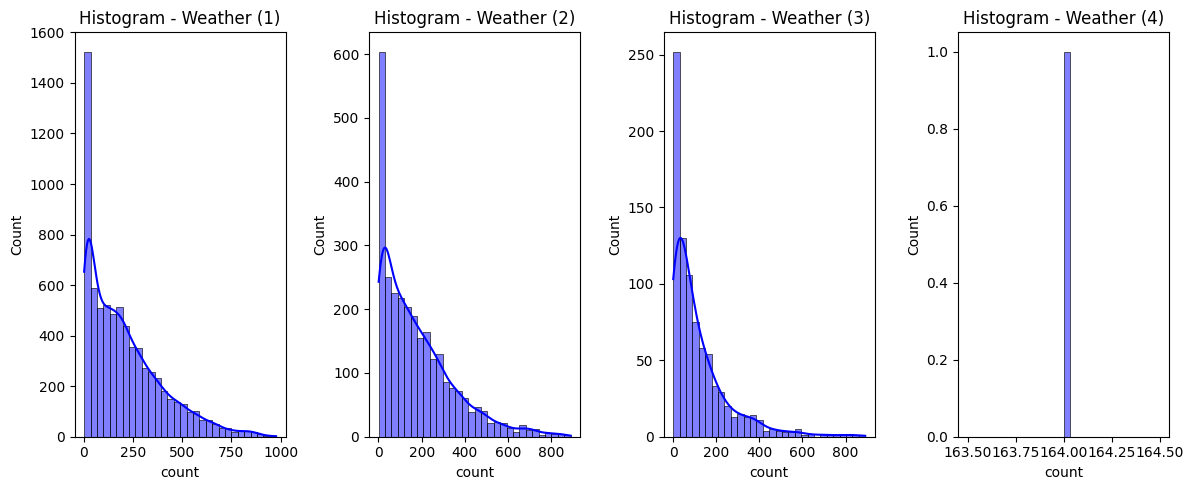

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
weather_1 = df_org[df_org['weather'] == 1]['count']
weather_2 = df_org[df_org['weather'] == 2]['count']
weather_3 = df_org[df_org['weather'] == 3]['count']
weather_4 = df_org[df_org['weather'] == 4]['count']

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
sns.histplot(weather_1, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (1)')

plt.subplot(1, 4, 2)
sns.histplot(weather_2, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (2)')

plt.subplot(1, 4, 3)
sns.histplot(weather_3, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (3)')

plt.subplot(1, 4, 4)
sns.histplot(weather_4, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (4)')

plt.tight_layout()
plt.show()

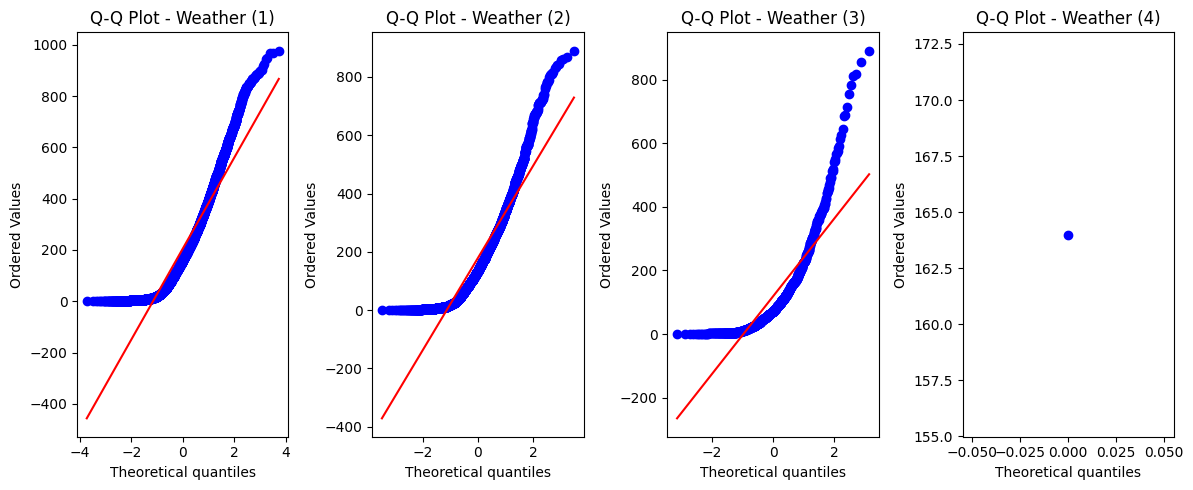

In [220]:
# Q-Q Plots
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
weather_1 = df_org[df_org['weather'] == 1]['count']
weather_2 = df_org[df_org['weather'] == 2]['count']
weather_3 = df_org[df_org['weather'] == 3]['count']
weather_4 = df_org[df_org['weather'] == 4]['count']

plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
stats.probplot(weather_1, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (1)")

plt.subplot(1, 4, 2)
stats.probplot(weather_2, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (2)")

plt.subplot(1, 4, 3)
stats.probplot(weather_3, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (3)")

plt.subplot(1, 4, 4)
stats.probplot(weather_4, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (4)")

plt.tight_layout()
plt.show()

   *  **Check test Assumptions:** Levene’s Test to Check for Equal Variance

In [221]:
from scipy.stats import levene

stat, p_value = levene(weather_1, weather_2, weather_3, weather_4)
print(f"Levene’s Test p-value: {p_value}")

Levene’s Test p-value: 3.504937946833238e-35


*  Set a significance level (alpha) = 0.05

Since p-value: 3.504937946833238e-35 < Significance level 0.05, therefore Variance are not Equal

Note: Despite violation of assumptions, proceeded with one-way ANOVA as instructed in the case-study.

*  **ANNOVA :** Calculate test Statistics

In [222]:
from scipy.stats import f_oneway

# Group the 'count' values by each weather type
weather_1 = df_org[df_org['weather'] == 1]['count']
weather_2 = df_org[df_org['weather'] == 2]['count']
weather_3 = df_org[df_org['weather'] == 3]['count']
weather_4 = df_org[df_org['weather'] == 4]['count']

# Apply One-Way ANOVA
f_stat, p_value = f_oneway(weather_1, weather_2, weather_3, weather_4)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one weather has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between different weather types.')

ANOVA F-statistic: 65.53024112793271
p-value: 5.482069475935669e-42
Reject null hypothesis : At least one weather has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 5.482069475935669e-42 is much smaller than 0.05, so we reject the null hypothesis by saying At least one weather has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one weather has a different average number of cycle rentals compared to the others.

Also validating the findings using non-parametric Kruskal-Wallis test (as robustness check).
  * **Kruskal-Wallis H-test :** Calculate test Statistics

In [223]:
from scipy.stats import kruskal

# Group the 'count' values by 'weather'
weather_1 = df_org[df_org['weather'] == 1]['count']
weather_2 = df_org[df_org['weather'] == 2]['count']
weather_3 = df_org[df_org['weather'] == 3]['count']
weather_4 = df_org[df_org['weather'] == 4]['count']

# Perform the Kruskal-Wallis H-test
stat, p_value = kruskal(weather_1, weather_2, weather_3, weather_4)

print("Kruskal-Wallis Test Statistic:", stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one weather has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between different weather types.')

Kruskal-Wallis Test Statistic: 205.00216514479087
p-value: 3.501611300708679e-44
Reject null hypothesis : At least one weather has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 3.501611300708679e-44 is much smaller than 0.05, so we reject the null hypothesis by saying At least one weather has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one weather has a different average number of cycle rentals compared to the others.

**Observations:**

* Both **Annova** and **Kruskal** test give same result i.e **p-value < 0.05, Conclusion is to Reject Null Hypothesis**

**Conclusion:**

Since the p-value < 0.05, we reject the null hypothesis.

There is statistically significant evidence to suggest that at least one weather has a different average number of cycle rentals compared to the others.

**Business Implications:**

* Weather conditions significantly impact the number of cycle rentals.
* This insight can help Yulu optimize bike availability and maintenance scheduling. For example, on clear or favorable weather days (weather type 1), higher rental demand can be expected, so more bikes should be deployed and operational.
* On days with adverse weather (e.g., heavy rain or mist), demand is lower, so resources like staffing or bike availability can be scaled down accordingly to reduce operational costs.

##### Capped dataframe (With Outlier treatment)

   *  **Check test Assumptions:** Normality for Histogram and Q-Q Plot

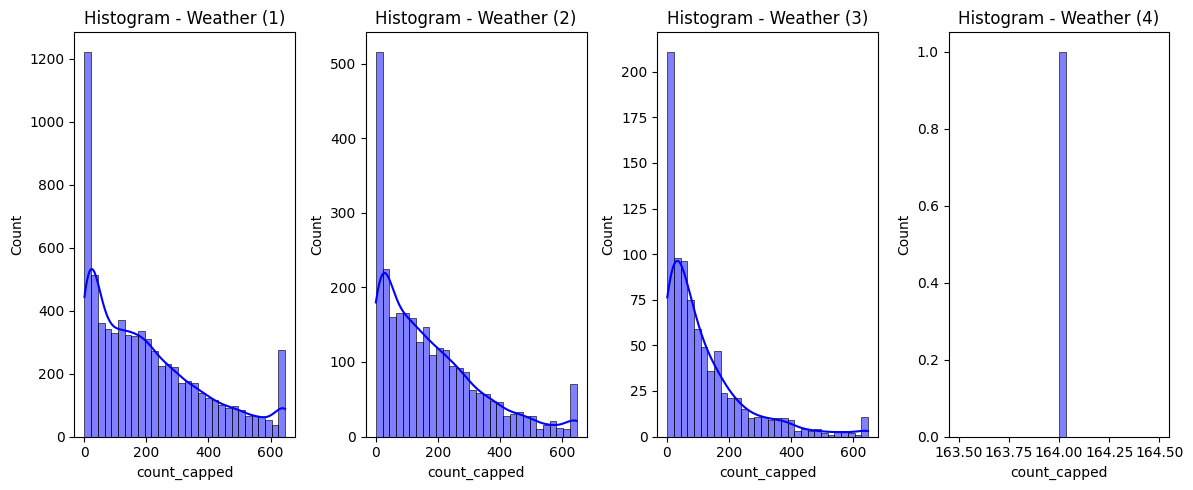

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
weather__1 = df_copy_iqr[df_copy_iqr['weather'] == 1]['count_capped']
weather__2 = df_copy_iqr[df_copy_iqr['weather'] == 2]['count_capped']
weather__3 = df_copy_iqr[df_copy_iqr['weather'] == 3]['count_capped']
weather__4 = df_copy_iqr[df_copy_iqr['weather'] == 4]['count_capped']

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
sns.histplot(weather__1, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (1)')

plt.subplot(1, 4, 2)
sns.histplot(weather__2, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (2)')

plt.subplot(1, 4, 3)
sns.histplot(weather__3, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (3)')

plt.subplot(1, 4, 4)
sns.histplot(weather__4, kde=True, bins=30, color='blue')
plt.title('Histogram - Weather (4)')

plt.tight_layout()
plt.show()

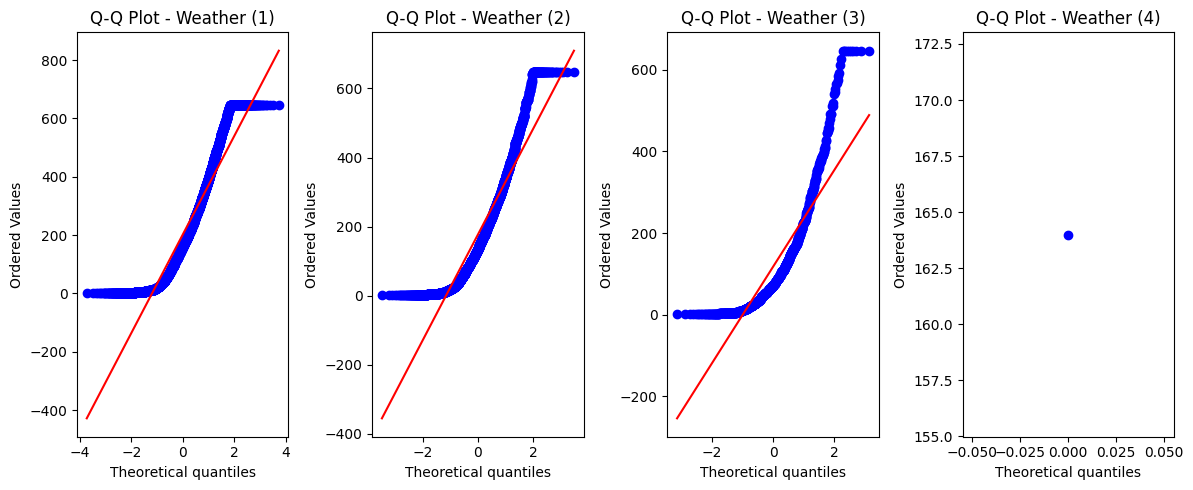

In [229]:
# Q-Q Plots
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Split the data
weather__1 = df_copy_iqr[df_copy_iqr['weather'] == 1]['count_capped']
weather__2 = df_copy_iqr[df_copy_iqr['weather'] == 2]['count_capped']
weather__3 = df_copy_iqr[df_copy_iqr['weather'] == 3]['count_capped']
weather__4 = df_copy_iqr[df_copy_iqr['weather'] == 4]['count_capped']

plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
stats.probplot(weather__1, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (1)")

plt.subplot(1, 4, 2)
stats.probplot(weather__2, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (2)")

plt.subplot(1, 4, 3)
stats.probplot(weather__3, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (3)")

plt.subplot(1, 4, 4)
stats.probplot(weather__4, dist="norm", plot=plt)
plt.title("Q-Q Plot - Weather (4)")

plt.tight_layout()
plt.show()

   *  **Check test Assumptions:** Levene’s Test to Check for Equal Variance

In [230]:
from scipy.stats import levene

stat, p_value = levene(weather__1, weather__2, weather__3, weather__4)
print(f"Levene’s Test p-value: {p_value}")

Levene’s Test p-value: 2.499984328437755e-38


*  Set a significance level (alpha) = 0.05

Since p-value: 2.499984328437755e-38 < Significance level 0.05, therefore Variance are not Equal

Note: Despite violation of assumptions, proceeded with one-way ANOVA as instructed in the case-study.

*  **ANNOVA :** Calculate test Statistics

In [231]:
from scipy.stats import f_oneway

# Group the 'count' values by each weather type
weather__1 = df_copy_iqr[df_copy_iqr['weather'] == 1]['count_capped']
weather__2 = df_copy_iqr[df_copy_iqr['weather'] == 2]['count_capped']
weather__3 = df_copy_iqr[df_copy_iqr['weather'] == 3]['count_capped']
weather__4 = df_copy_iqr[df_copy_iqr['weather'] == 4]['count_capped']

# Apply One-Way ANOVA
f_stat, p_value = f_oneway(weather__1, weather__2, weather__3, weather__4)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one weather has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between different weather types.')

ANOVA F-statistic: 68.4116520342703
p-value: 8.034967610817961e-44
Reject null hypothesis : At least one weather has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 8.034967610817961e-44 is much smaller than 0.05, so we reject the null hypothesis by saying At least one weather has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one weather has a different average number of cycle rentals compared to the others.

Also validating the findings using non-parametric Kruskal-Wallis test (as robustness check).
  * **Kruskal-Wallis H-test :** Calculate test Statistics

In [233]:
from scipy.stats import kruskal

# Group the 'count' values by 'weather'
weather__1 = df_copy_iqr[df_copy_iqr['weather'] == 1]['count_capped']
weather__2 = df_copy_iqr[df_copy_iqr['weather'] == 2]['count_capped']
weather__3 = df_copy_iqr[df_copy_iqr['weather'] == 3]['count_capped']
weather__4 = df_copy_iqr[df_copy_iqr['weather'] == 4]['count_capped']

# Perform the Kruskal-Wallis H-test
stat, p_value = kruskal(weather__1, weather__2, weather__3, weather__4)

print("Kruskal-Wallis Test Statistic:", stat)
print("p-value:", p_value)
if p_value < 0.05:
  print(f'Reject null hypothesis : At least one weather has significantly different average rentals.')
else:
  print(f'Failed to Reject null hypothesis : There is no significant difference in cycle rentals between different weather types.')

Kruskal-Wallis Test Statistic: 205.04853208154285
p-value: 3.421748763291878e-44
Reject null hypothesis : At least one weather has significantly different average rentals.


*  Decision to accept or reject null hypothesis.
  * The p_value 3.421748763291878e-44 is much smaller than 0.05, so we reject the null hypothesis by saying At least one weather has significantly different average rentals.

* Inference from the analysis
  * There is statistically significant evidence to suggest that at least one weather has a different average number of cycle rentals compared to the others.

**Observations:**

* Both **Annova** and **Kruskal** test give same result i.e **p-value < 0.05, Conclusion is to Reject Null Hypothesis**

**Conclusion:**

Since the p-value < 0.05, we reject the null hypothesis.

There is statistically significant evidence to suggest that at least one weather has a different average number of cycle rentals compared to the others.

**Business Implications:**

* Weather conditions significantly impact the number of cycle rentals.
* This insight can help Yulu optimize bike availability and maintenance scheduling. For example, on clear or favorable weather days (weather type 1), higher rental demand can be expected, so more bikes should be deployed and operational.
* On days with adverse weather (e.g., heavy rain or mist), demand is lower, so resources like staffing or bike availability can be scaled down accordingly to reduce operational costs.

##### Final Interpretation
In both original and capped datasets:

There is statistically significant evidence to suggest that at least one weather has a different average number of cycle rentals compared to the others.

This conclusion is robust to outlier treatment.

Hence, “weather” has a significant impact on the number of electric cycles rented.

#### Chi-square test to check if Weather is dependent on the season

**Hypothesis Formulation:**
  * Set up Null Hypothesis (H0):
    * Weather is independent of season.
  * Set up Alternate Hypothesis (Ha):
    * Weather is dependent on season.

Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
   *  Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

*  Set a significance level (alpha) = 0.05

*  **Chi-Square Test :** Calculate test Statistics

In [234]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(categorical_df['season'], categorical_df['weather'])
contingency_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [235]:
# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected frequencies:\n", pd.DataFrame(expected,
                                                index=contingency_table.index,
                                                columns=contingency_table.columns))
if p < 0.05:
    print("Reject the null hypothesis: Weather is dependent on season.")
else:
    print("Fail to reject the null hypothesis: No evidence that weather is dependent on season.")

Chi-Square Test Statistic: 49.158655596893624
Degrees of Freedom: 9
P-value: 1.549925073686492e-07
Expected frequencies:
 weather            1           2           3         4
season                                                
1        1774.546390  699.258130  211.948742  0.246739
2        1805.597648  711.493845  215.657450  0.251056
3        1805.597648  711.493845  215.657450  0.251056
4        1806.258313  711.754180  215.736359  0.251148
Reject the null hypothesis: Weather is dependent on season.


**Observations:**

* Chi-Square Value: 49.16, indicates a large difference between the observed and expected weather frequencies across seasons.

* p-value: 1.55e-07, this is far less than 0.05, so the result is statistically significant.

* Degrees of Freedom: 9

* Expected Frequencies:

  * Very small values (like 0.25) are seen in the expected frequencies for Weather category 4, indicating that some categories are rare and this may slightly affect the robustness of the test.

**Conclusion:**

* Since p < 0.05, you reject the null hypothesis.

* This means there is a statistically significant association between Weather and Season.

* The weather is dependent on the season, certain types of weather are more or less likely to occur in specific seasons.

**Note:**

* Even though the p-value says there's a significant relationship, if Chi-square Test Assumptions fails then the Chi-square test might give inaccurate results.

* As per Chi-square important assumption :

At least 80% of the expected frequencies should be ≥ 5, and no expected frequency should be < 1.

**Chi-square Assumption test**

In [236]:
expected_values = expected.flatten()

# Check for values < 5 and < 1
count_less_than_5 = np.sum(expected_values < 5)
count_less_than_1 = np.sum(expected_values < 1)
total = len(expected_values)

print("Expected values < 5:", count_less_than_5)
print("Expected values < 1:", count_less_than_1)
print("Percentage < 5:", (count_less_than_5 / total) * 100)

Expected values < 5: 4
Expected values < 1: 4
Percentage < 5: 25.0


**Chi-square important assumption is:**

At least 80% of the expected frequencies should be ≥ 5, and no expected frequency should be < 1.

  * If this condition is met, the Chi-square approximation is valid.

  * If this condition is not met, the Chi-square test might give inaccurate results.

* The Chi-square test result may not be reliable or accurate.

**Observations:**

This violates the assumptions of the Chi-square test because:

Test requirement is:

  * No expected frequency should be less than 1 and we have 4 values < 1

  * No more than 20% of the expected values should be less than 5 and I got 25%

**This means Chi-square test results are inaccurate.**

* To ensure statistical validity, it is advisable to merge this rare category with a similar one—such as combining it with 'Light Rain' to form a broader and more meaningful weather classification.

**Prior to combining** "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" with "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"

In [237]:
weather_combined_df = df_org.copy()
weather_combined_df['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


**After combining**

In [238]:
weather_combined_df['weather_combined'] = weather_combined_df['weather'].replace({4: 3})
weather_combined_df['weather_combined'].value_counts()

,count
weather_combined,
1,7192
2,2834
3,860


In [239]:
contingency_combined = pd.crosstab(weather_combined_df['season'], weather_combined_df['weather_combined'])
contingency_combined

weather_combined,1,2,3
season,,,
1,1759,715,212
2,1801,708,224
3,1930,604,199
4,1702,807,225


In [240]:
from scipy.stats import chi2_contingency
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_combined)

expected_values = expected.flatten()
count_less_than_5 = sum(expected_values < 5)
count_less_than_1 = sum(expected_values < 1)
percent_less_than_5 = (count_less_than_5 / len(expected_values)) * 100

print("New Contingency Table:\n", contingency_combined)
print("\nChi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("\nExpected values < 5:", count_less_than_5)
print("Expected values < 1:", count_less_than_1)
print("Percentage of expected values < 5:", percent_less_than_5)

New Contingency Table:
 weather_combined     1    2    3
season                          
1                 1759  715  212
2                 1801  708  224
3                 1930  604  199
4                 1702  807  225

Chi-square statistic: 46.098057769660684
p-value: 2.8304096630424703e-08
Degrees of freedom: 6

Expected values < 5: 0
Expected values < 1: 0
Percentage of expected values < 5: 0.0


In [241]:
if p_value < 0.05:
    print("Reject null hypothesis: Weather is dependent on season.")
else:
    print("Fail to reject null hypothesis: Weather is independent of season.")

Reject null hypothesis: Weather is dependent on season.


**Observations:**

* Chi-square statistic: 46.10, a large value indicates strong evidence of association between season and weather_combined.

* p-value: 2.83e-08, extremely small or much less than 0.05 this means there is statistically significance between weather and season.

* Reject the null hypothesis, Weather (even after combining) still depends on season.

* Degrees of Freedom: 6

* Expected Value Checks: < 5: 0, < 1: 0, Percentage of expected values < 5: 0.0%

* This means the assumptions of Chi-square test are fully satisfied now.

**Business Implications:**

* Weather still changes with season, even after combining categories, the strong seasonal dependency remains.

* Plan ahead for bad weather seasons that might reduce ride demand.

* Prepare for moderate weather seasons with higher user activity.

* Shift fleets or reduce idle bikes in low-demand weather-season combos.

* Boost support, availability, and marketing during favorable weather periods.

* Offer ride protection, flexible pricing, or bonuses in tougher weather.

* Launch promotions during weather-friendly seasons to capture higher demand.

## **Overall Observations from Analysis:**

**1. Working Day vs. Number of Rides**

**Observation:** The average number of cycles rented is slightly higher on working days than on holidays or weekends.

**Statistical Test:** 2-sample t-test was used.

**Result:** The p-value is high, so we fail to reject the null hypothesis , the mean number of electric cycles rented is the same on working days and non-working days.

**Interpretation:** The number of cycles rented on working days and non-working days is nearly the same, with no significant difference in the mean values.

**2. Season vs. Number of Rides**

**Observation:** Ride count is highest in fall (season 3) and lowest in spring (season 1).

**Statistical Test:** ANOVA was used.

**Result:** p-value < 0.05, so season significantly affects demand.

**Interpretation:** People prefer riding in more pleasant weather. Spring may be too hot/humid or have fewer users due to other reasons.

**3. Weather vs. Number of Rides**

**Observation:** Ride count is highest in clear weather (type 1) and lowest in rainy/snowy conditions (type 3 or 4).

**Statistical Test:** ANOVA was used.

**Result:** p-value is low → Weather significantly affects rentals.

**Interpretation:** People avoid riding in bad weather like rain, mist, or snow.

**4. Season vs. Weather**

**Observation:** Certain weather types occur more in specific seasons (e.g., rain in monsoon).

**Statistical Test:** Chi-square test was used.

**Result:** p-value < 0.05 → Weather and season are dependent.

**Interpretation:** Yulu can plan ahead by looking at seasonal weather patterns.

## **Recommendations to Enhance Revenue and Growth**

**1. Smart Bike Reallocation by Season & Weather(Priority 2)**

  * Allocate more bikes during high-demand seasons (fall and summer).

  * Reduce fleet or shift to other locations during low-demand seasons like spring.

  * Track weather forecasts to plan availability — fewer bikes in bad weather, more during good weather.

**2. Time & Day-Based Demand Planning(Priority 1)**

  * Increase bike supply during working days, especially during office commute hours (morning and evening).

  * Deploy more bikes near office zones, metro stations, and tech parks on weekdays.

  * Weekends and holidays can focus on recreational routes, parks, or tourist areas.

**3. Use Promotions to Boost Off-Peak Usage(Priority 5)**

  * Run special offers, discounts, or reward points during spring and bad weather days to attract more users.

  * Promote group rides or festival-based offers during holidays when demand is low.

**4. User Segmentation & Targeted Marketing(Priority 3)**

  * Registered users drive most of the demand. Engage them with loyalty programs.

  * Casual users are more sensitive to weather — offer reminders or flexible pricing to encourage them.

**5. Build a Predictive Model for Forecasting Demand(Priority 4)**

  * Use features like temp, humidity, hour, workingday, season, and weather to predict future demand and optimize fleet planning in real time.

## **The goal is to:**

**1) Identify which factors impact the number of rides.**

* Season and Weather have a statistically significant impact on ride demand (p-value < 0.05 from ANOVA tests).

* Working day vs. non-working day does not show a significant difference in the average number of rides (high p-value from 2-sample t-test).

* Weather and Season are interdependent, as revealed by the Chi-square test.


**2) Understand how these factors affect demand.**

* Season: Fall has the highest ride volume, while Spring has the lowest. This suggests that users prefer riding in more favorable weather.

* Weather: Clear weather significantly boosts ride counts, whereas bad weather (rain, snow, mist) leads to fewer rentals.

* Day Type: There is no major difference in ride numbers between working and non-working days, indicating consistent usage patterns.


**3) Use these insights to plan better services, pricing, and marketing.**

* Smart Fleet Allocation: Shift bikes to high-demand areas in peak seasons and reduce supply during low-demand periods or poor weather.

* Targeted Promotions: Offer discounts during low-demand times (e.g., spring, rainy days) to boost usage.

* Time & Location Strategy: Focus on office hubs during weekdays and recreational zones on weekends.

* User-Centric Campaigns: Use segmentation to reward loyal (registered) users and incentivize casual users based on weather or day type.

* Demand Forecasting: Develop a predictive model using features like weather, season, temperature, and day type to optimize inventory and pricing in real-time.